**Credit Score Classification**




In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action  ='ignore', category = FutureWarning)

In [3]:
pd.options.mode.copy_on_write = True

In [4]:
# loading the dataset and saving it as df
df = pd.read_csv('/content/credit.csv')


In [5]:
#copying and saving the dataset as df inorder to retain the original dataset
data= df.copy()


**The Purpose of the Project**

This project focuses on credit classification. The main objective is to develop a predictive model to categorize credit applicants into different risk levels. By analyzing various features and historical data of applicants, the model aims to assist financial institutions in evaluating credit applications more effectively. The classification goal is to categorize credit scores into three main groups: Standard, Poor, and Good. The project aims to improve the efficiency and accuracy of the credit approval process, reduce default risks, and optimize the overall credit management strategy.


###**Data Description**

The dataset contains 28 columns

**1.ID:** Unique identifier for each record.

**2.Customer_ID:** Unique identifier for each customer.

**3.Month:** Month of the record.

**4.Name:** Customer's name.

**5.Age:** Customer's age.

**6.SSN:** Customer's Social Security Number.

**7.Occupation:** Customer's occupation.

**8.Annual_Income:** Customer's annual income.

**9.Monthly_Inhand_Salary:** Customer's Net monthly income.

**10.Num_Bank_Accounts:** Number of bank accounts the customer holds.

**11.Num_Credit_Card:** Number of credit cards the customer holds.

**12.Interest_Rate:** Interest rate on the customer's credit.

**13.Num_of_Loan:** Number of loans the customer has taken.

**14.Type_of_Loan:** Types of loans the customer has taken.

**15.Delay_from_due_date:** Number of days delayed from the due date.

**16.Num_of_Delayed_Payment:** Number of delayed payments.

**17.Changed_Credit_Limit:** Amount by which the credit limit has changed.

**18.Num_Credit_Inquiries:** Number of credit inquiries made by the customers.

**19.Credit_Mix:** Mix of credit types (e.g., Good, Standard, Bad).

**20.Outstanding_Debt:** Outstanding debt amount.

**21.Credit_Utilization_Ratio:** Ratio of credit utilized.

**22.Credit_History_Age:** Age of the credit history.

**23.Payment_of_Min_Amount:** Whether the customer pays the minimum amount (Yes/No).

**24.Total_EMI_per_month:** Total EMI paid by the customer.

**25.Amount_invested_monthly:** Amount invested monthly by the customer.

**26.Payment_Behaviour:** Customer's payment behavior.

**27.Monthly_Balance:** Monthly balance in the customer's financial accounts.

**28.Credit_Score:** Credit score category (e.g., Good, Standard, Bad).


## **Data Understanding**

In [6]:
data.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

In [7]:
# displays the column names
data.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
data.shape

(100000, 28)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [10]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

float64    18
object      7
int64       3
Name: count, dtype: int64

In [11]:
data.describe()

ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count    100000.000000   100000.00000  ...         100000.00000   
mean          5.533570       14.53208  ...             21.08141   
std           2.067098        8.74133  ...             14.80456   
min           0.000000        1.00000  ...              0.00000   
25%           4.000000        7.00000  ...             10.00000   
50%           5.000000       13.00000  ...             18.00000   
75%           7.000000       20.00000  ...             28.00000   
max          11.000000       34.00000  ...             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183.930696  

[8 rows x 21 columns]

## **Exploratory Data Analysis**


### **Credit_Score- target column analysis**


In [12]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

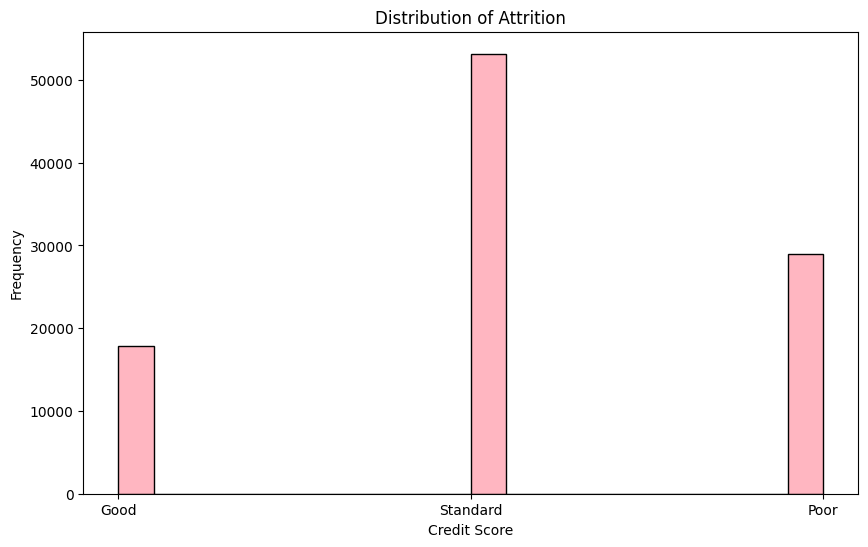

In [13]:
# Plotting Attrition
Credit = data['Credit_Score']

plt.figure(figsize = (10, 6))
plt.hist(Credit, bins = 20, color = 'lightpink', edgecolor = 'black')
plt.title('Distribution of Attrition')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

###**Univariant Analysis**


**Categorical Features**

In [14]:
# Filter categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Display the categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


**Distribution of Top 20 Type of Loan**

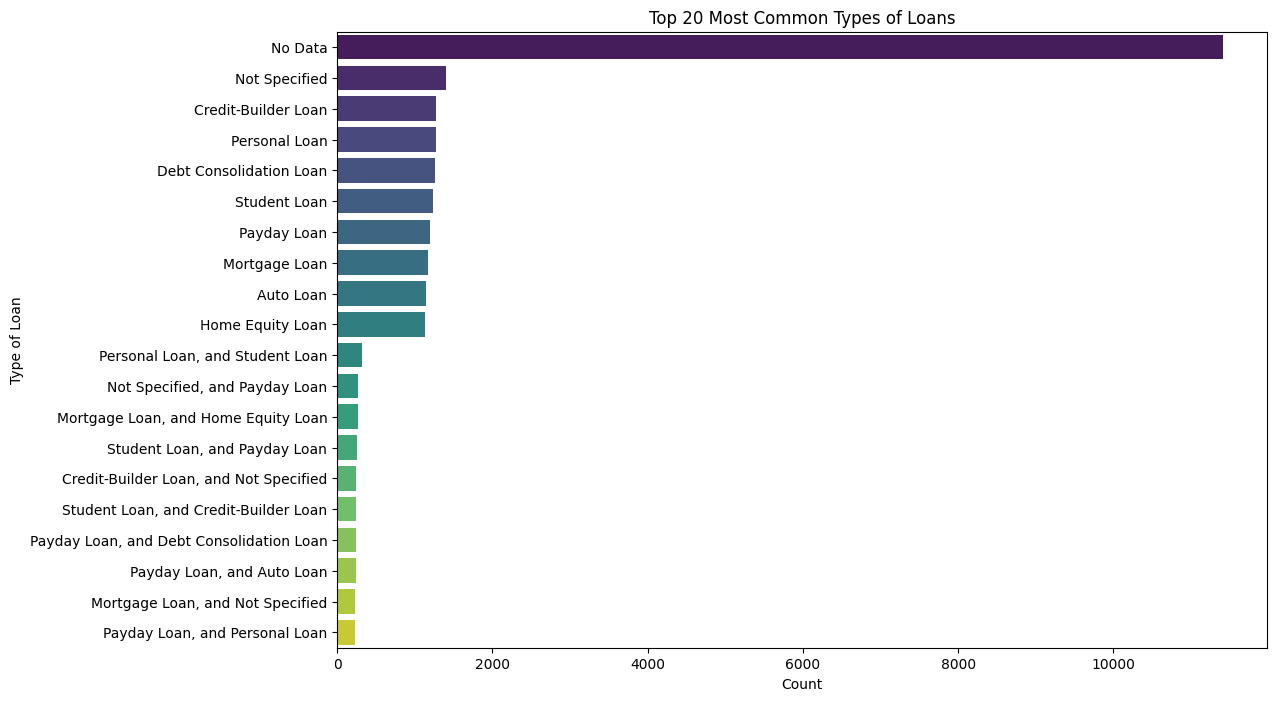

In [15]:
#Count the occurrences of each type of loan
loan_counts = data['Type_of_Loan'].value_counts()

#Sort the types of loans by their count in descending order
sorted_loan_counts = loan_counts.sort_values(ascending=False)

#Select the top 20 types
top_20_loans = sorted_loan_counts.head(20)

# Step 4: Visualize the distribution using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_loans.values, y=top_20_loans.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Type of Loan')
plt.title('Top 20 Most Common Types of Loans')
plt.show()


**Distribution of Top 20 Names**

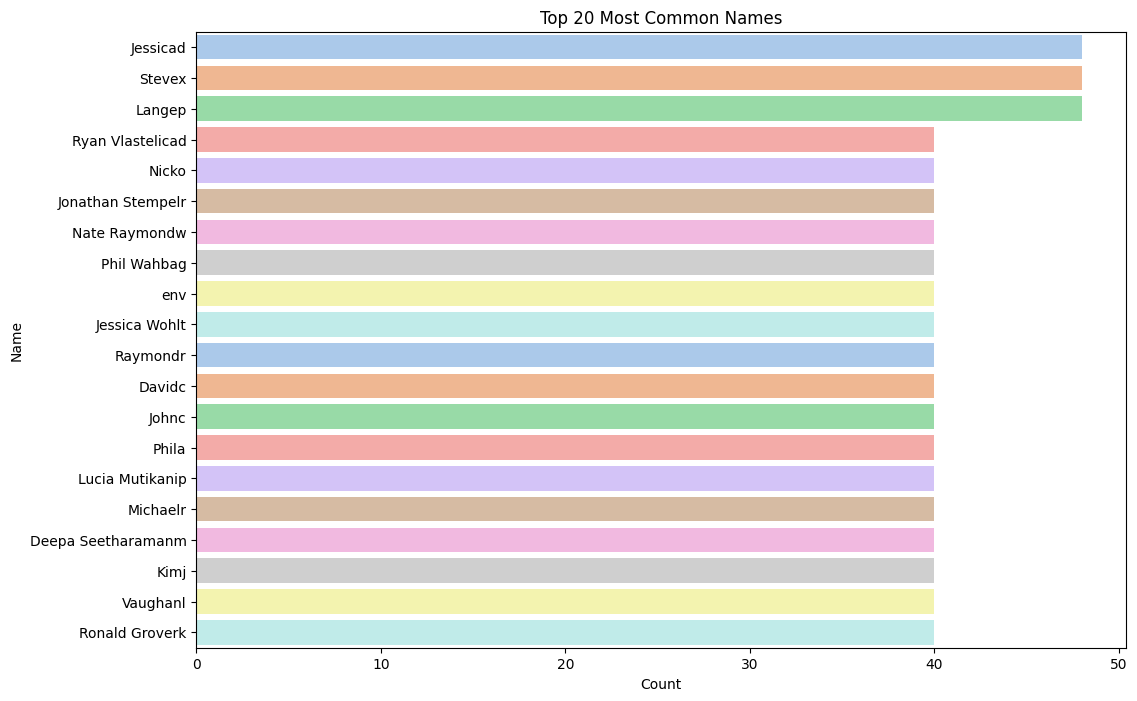

In [16]:
#Count the occurrences of each name
name_counts = data['Name'].value_counts()

#Sort the names by their count in descending order
sorted_name_counts = name_counts.sort_values(ascending=False)

#Select the top 20 names
top_20_names = sorted_name_counts.head(20)

# Step 4: Visualize the distribution using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_names.values, y=top_20_names.index, palette="pastel")
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 20 Most Common Names')
plt.show()


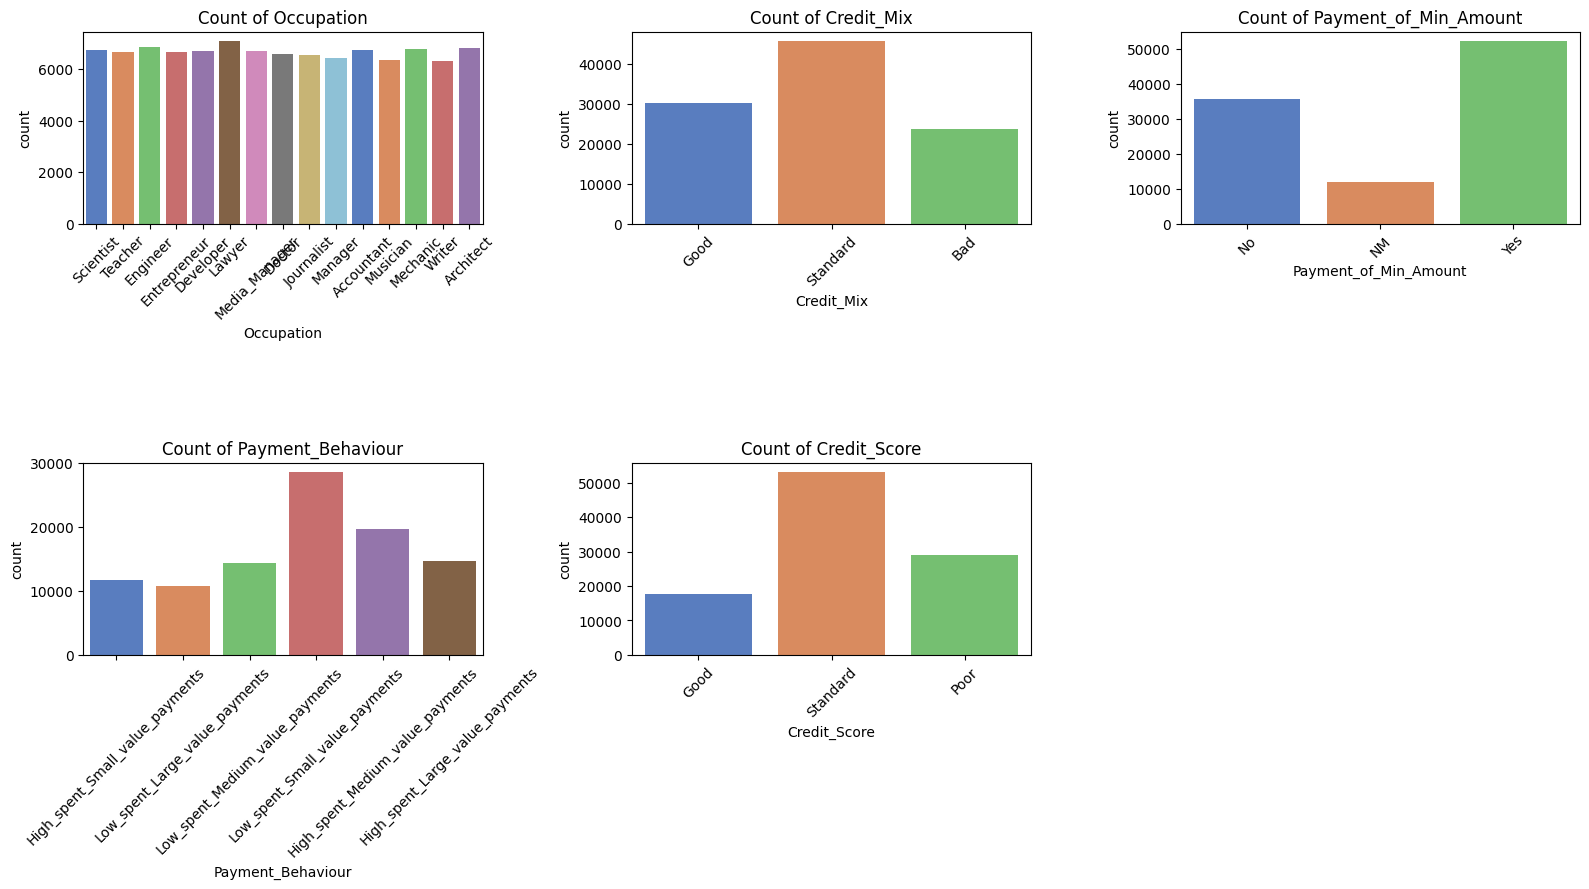

In [17]:
# List of categorical features
categorical_features = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
                        'Credit_Score']

# Set up the matplotlib figure
plt.figure(figsize=(16, 24))

# Plot bar plots for categorical features
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=data[feature],palette="muted")
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Numerical Features**

In [18]:
# Filter numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Display the numerical columns
print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


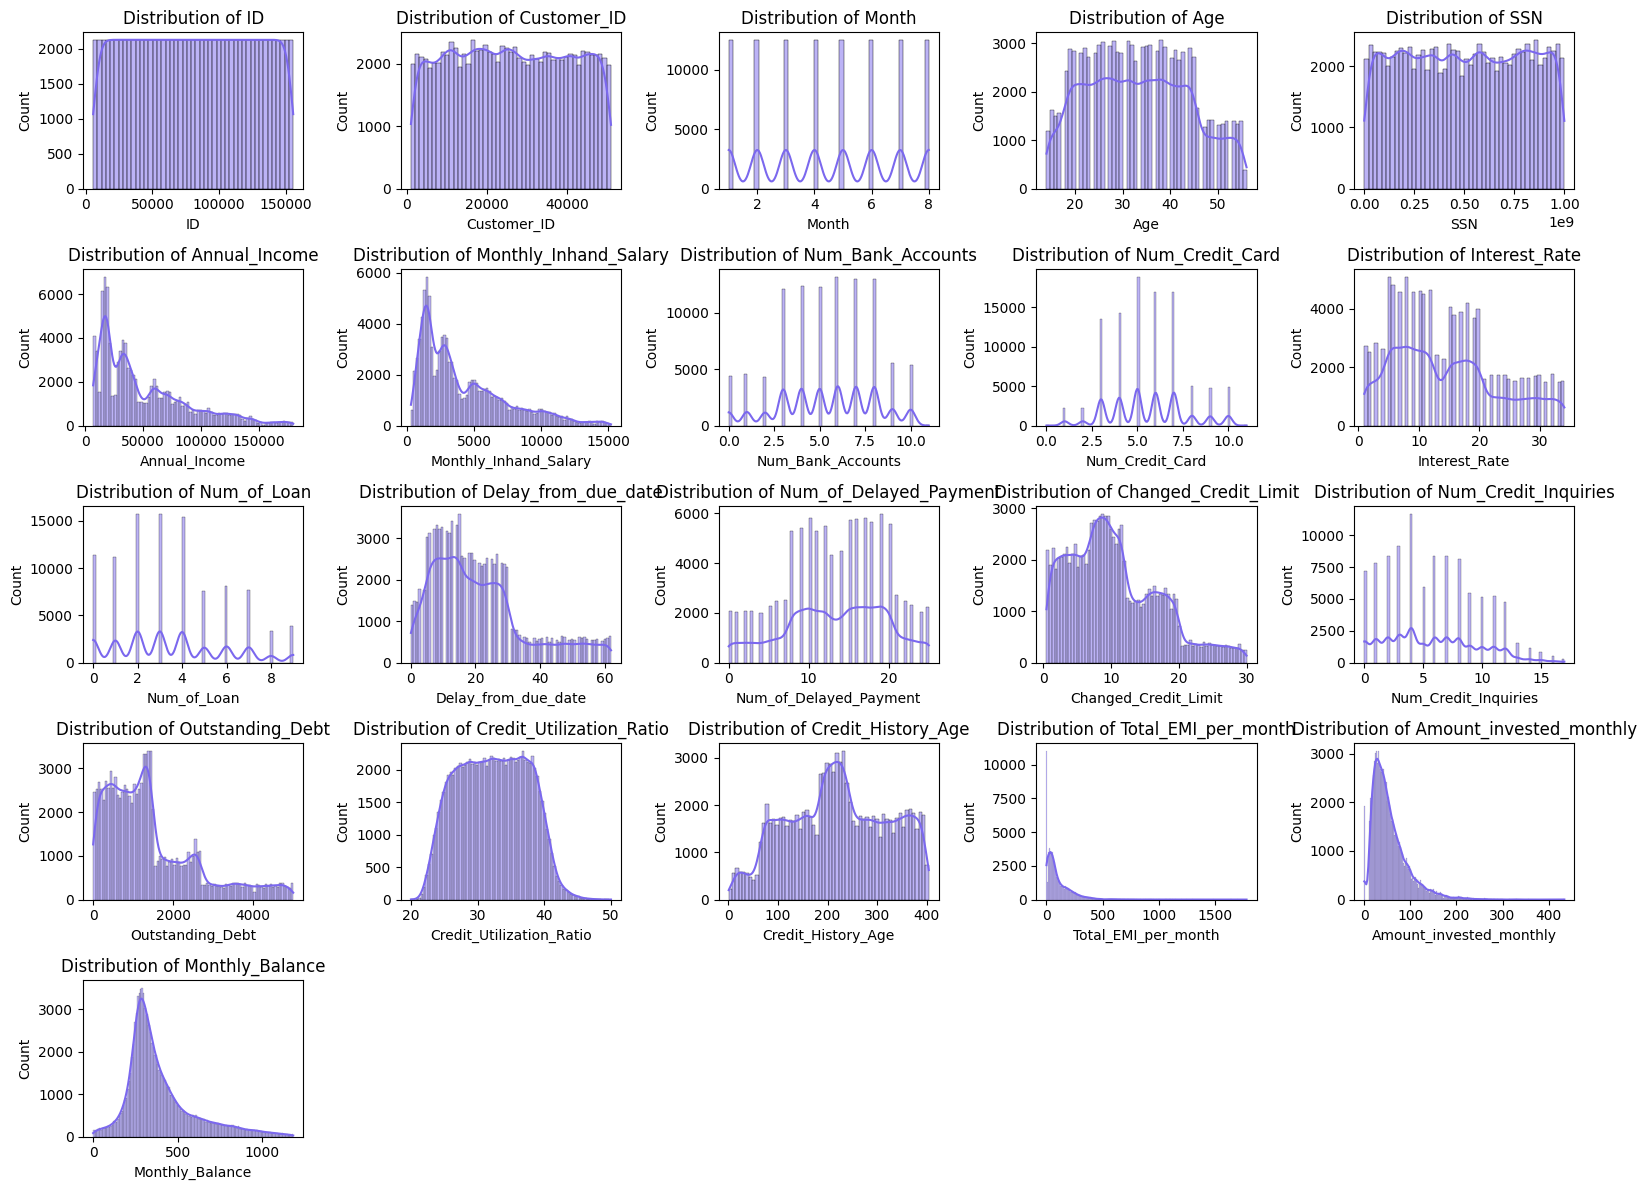

In [19]:
# List of numerical features
numerical_features = ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']


# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[feature], kde=True,color='mediumslateblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


**Distribution of Age Group**

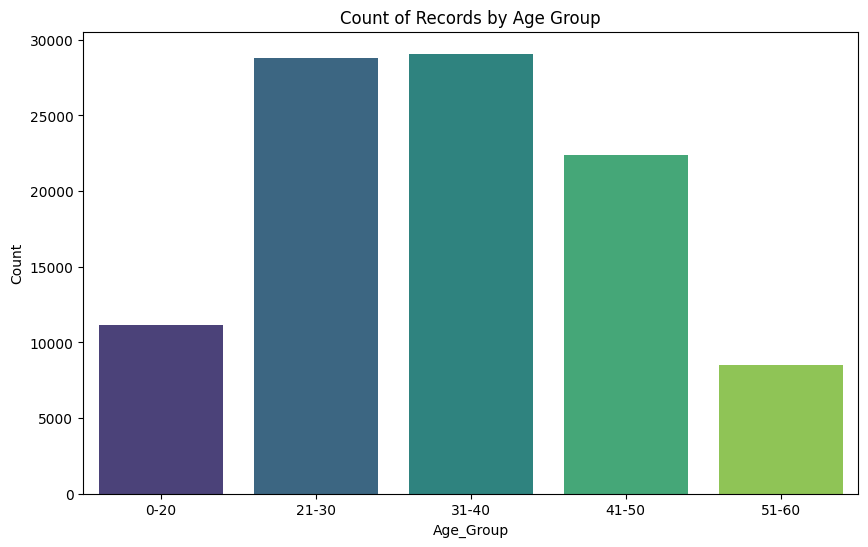

In [20]:
# Define the age bins and labels
bins = [0, 20, 30, 40, 50, 60]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60']

# Create a new column 'Age_Group' by binning the 'Age' column
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count the number of records in each age bin
age_bin_counts = data['Age_Group'].value_counts().sort_index().reset_index()
age_bin_counts.columns = ['Age_Group', 'Count']

# Plot the count of records by age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Count', data=age_bin_counts, palette='viridis')
plt.title('Count of Records by Age Group')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.show()


###**Bivariant Analysis**

**Categorical Features**


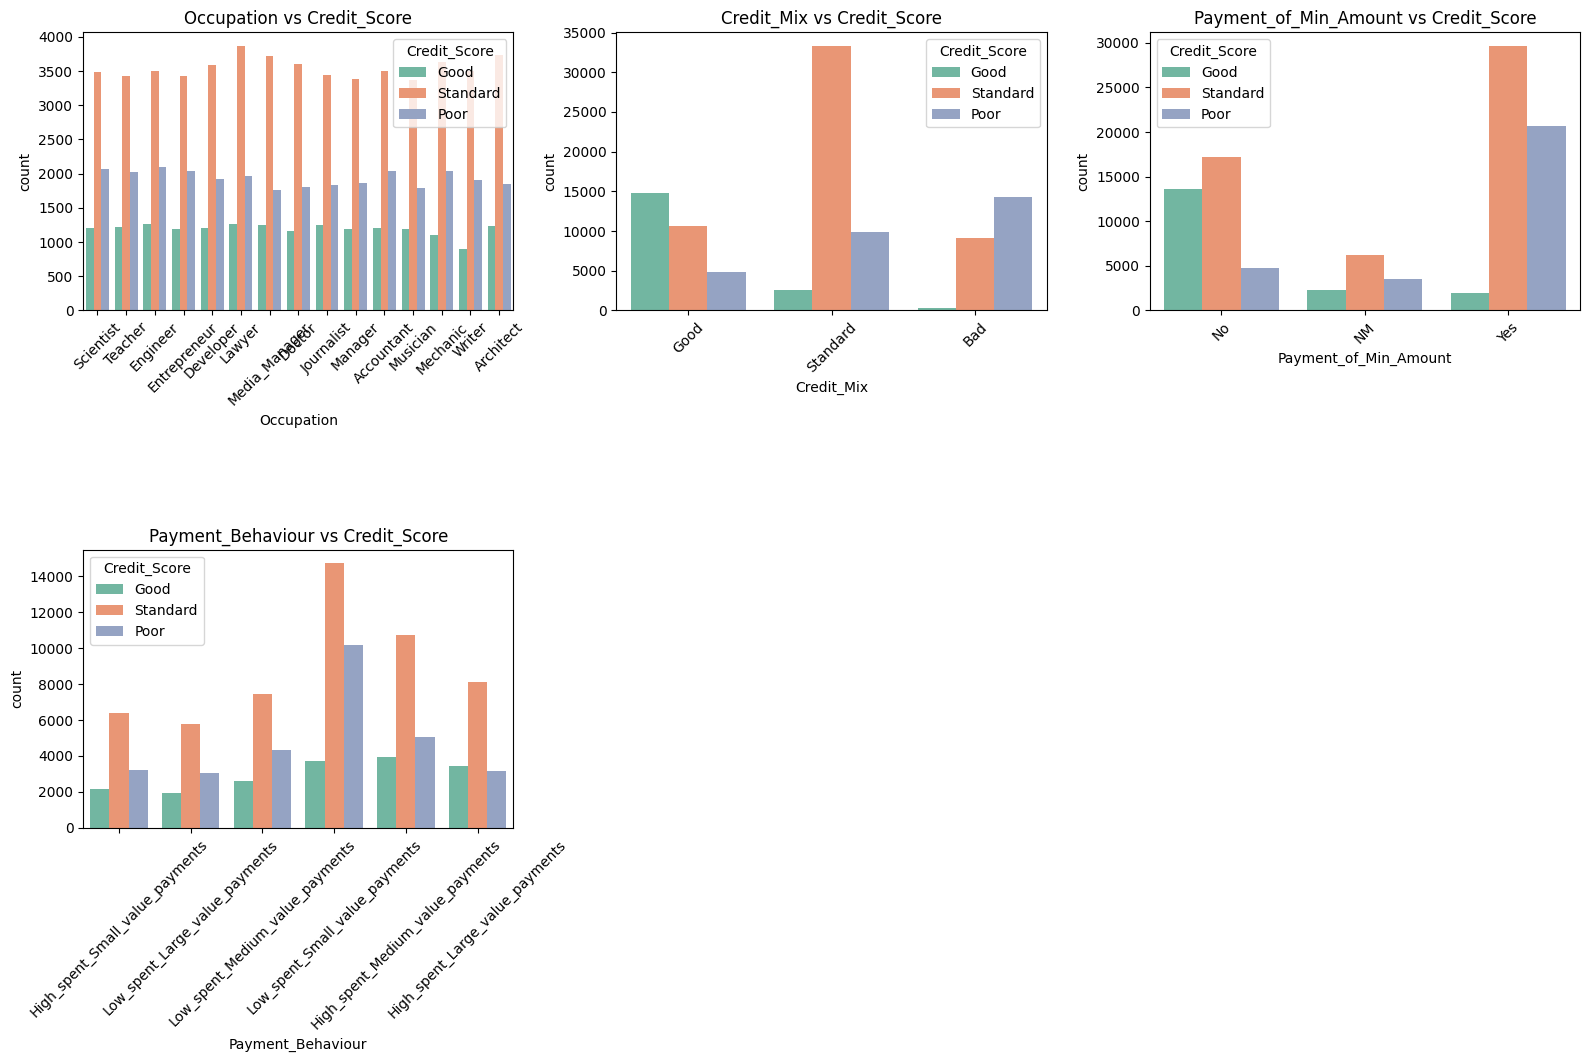

In [21]:
# List of categorical features
categorical_features = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Set up the matplotlib figure
plt.figure(figsize=(16, 24))

# Plot bar plots for each categorical feature against Attrition
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=data[feature], hue=data['Credit_Score'],palette="Set2")
    plt.title(f'{feature} vs Credit_Score')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


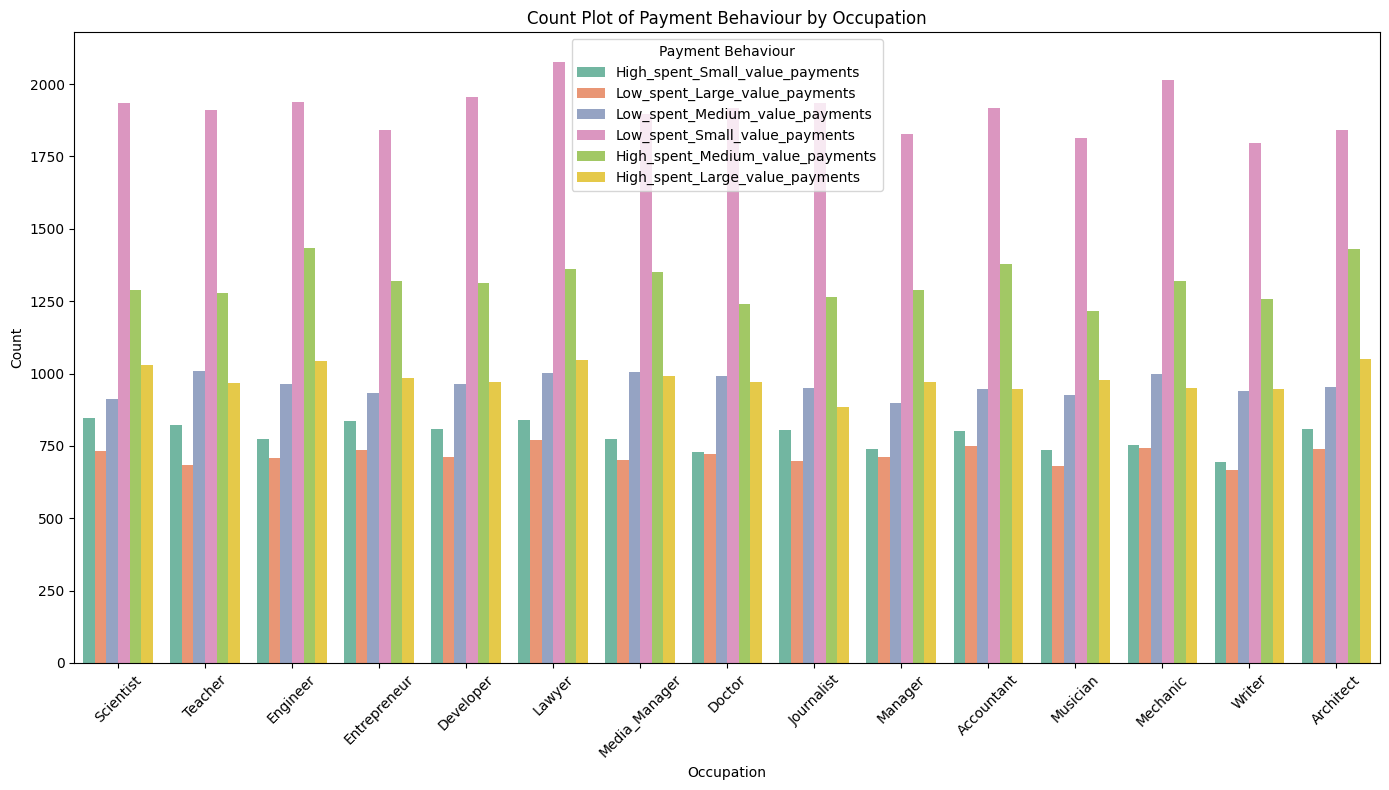

In [22]:
# Bivariate analysis for Occupation by Payment_Behaviour

# Visualization
plt.figure(figsize=(14, 8))
sns.countplot(x='Occupation', hue='Payment_Behaviour', data=data, palette='Set2')
plt.title('Count Plot of Payment Behaviour by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Behaviour')
plt.tight_layout()
plt.show()


**Numerical features**

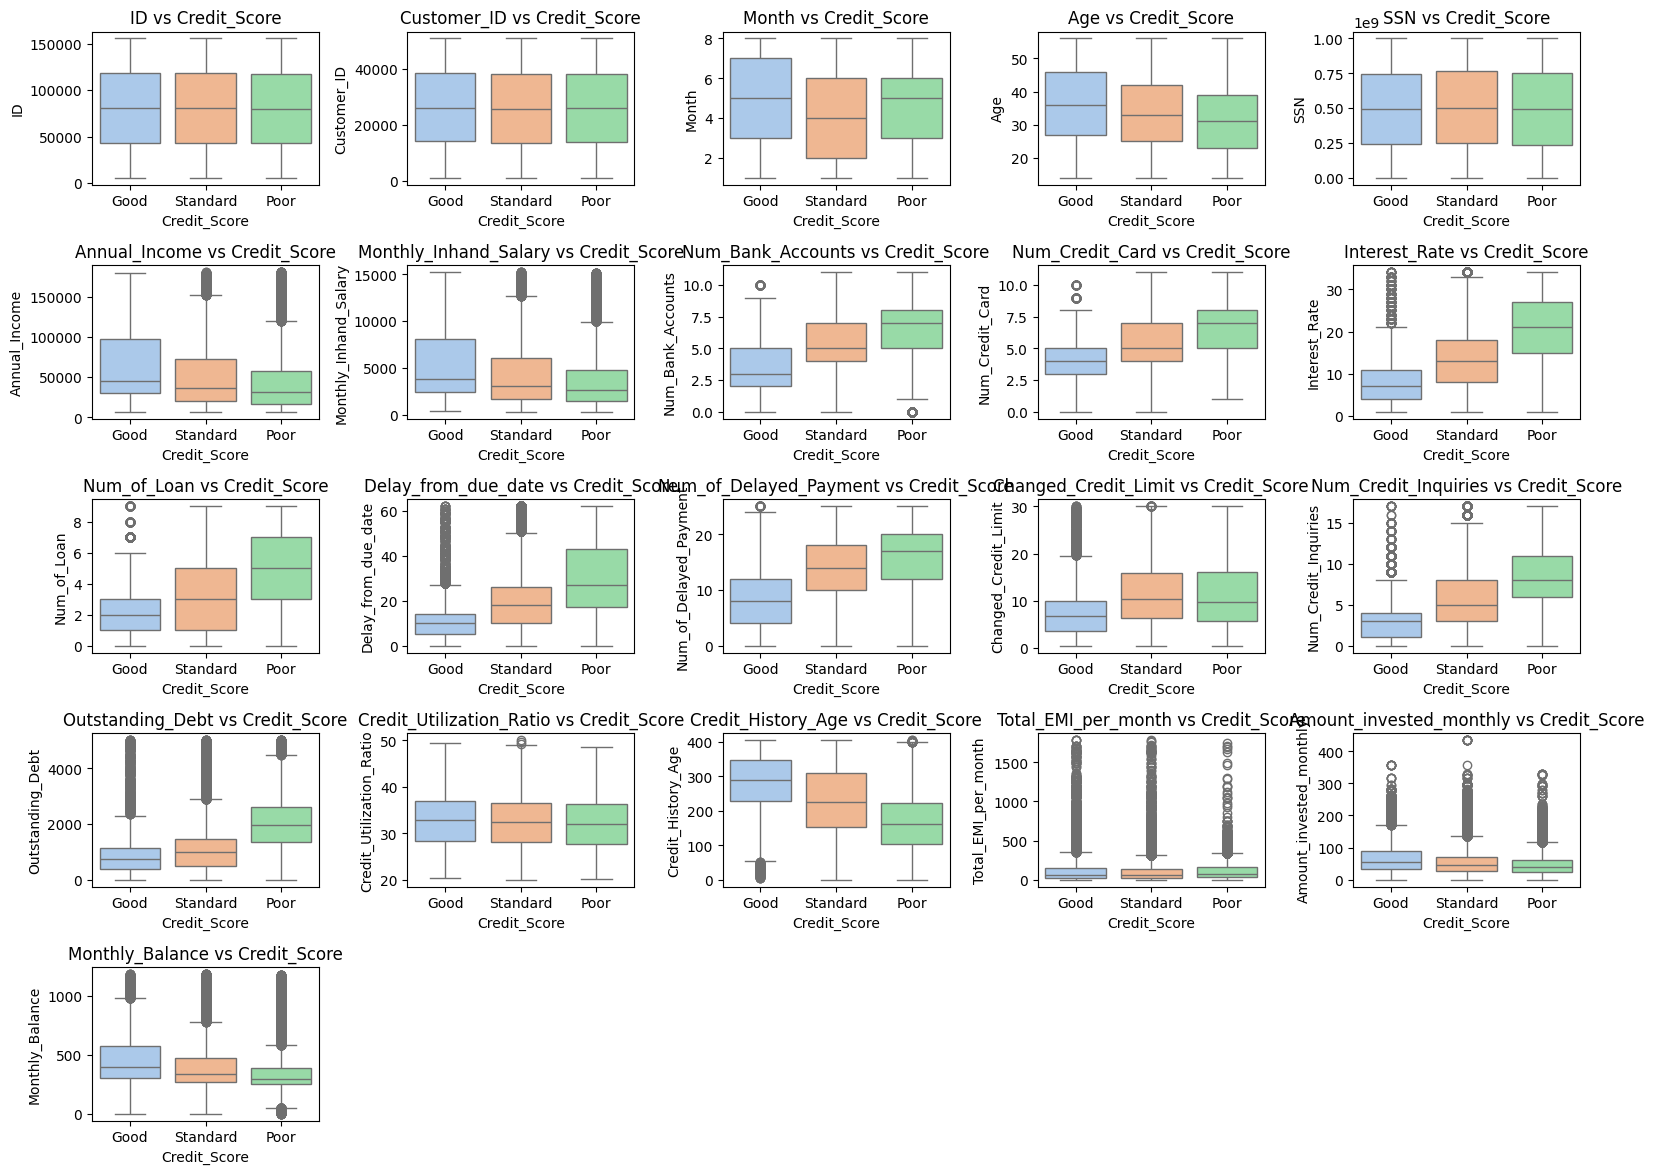

In [23]:
# List of numerical features
numerical_features = ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']


# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot box plots for each numerical feature against Attrition
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=data['Credit_Score'], y=data[feature],palette="pastel")
    plt.title(f'{feature} vs Credit_Score')

plt.tight_layout()
plt.show()


**Distribution of Average Annual Income by Age Group**

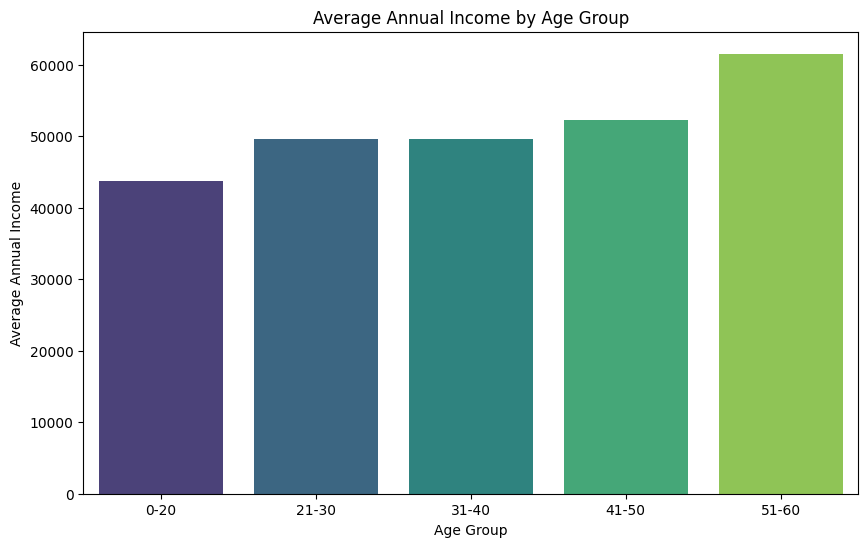

In [24]:
# Group by 'Age_Bin' and calculate the mean Annual Income for each bin
age_bin_annual_income = data.groupby('Age_Group')['Annual_Income'].mean().reset_index()

# Plot the average annual income by age bin
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Annual_Income', data=age_bin_annual_income, palette='viridis')
plt.title('Average Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income')
plt.show()


**Distribution of Average Monthly Inhand Salary by Age Group**

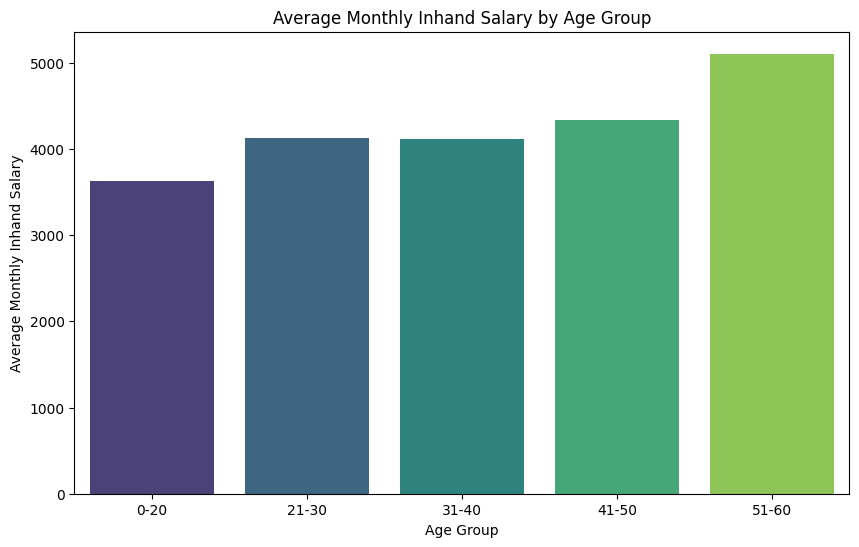

In [25]:
# Calculate the average Monthly Inhand Salary for each age group
age_bin_salary = data.groupby('Age_Group')['Monthly_Inhand_Salary'].mean().reset_index()

# Plot the average Monthly Inhand Salary by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Monthly_Inhand_Salary', data=age_bin_salary, palette='viridis')
plt.title('Average Monthly Inhand Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Monthly Inhand Salary')
plt.show()


**Distribution of Average Monthly Inhand Salary by Age**

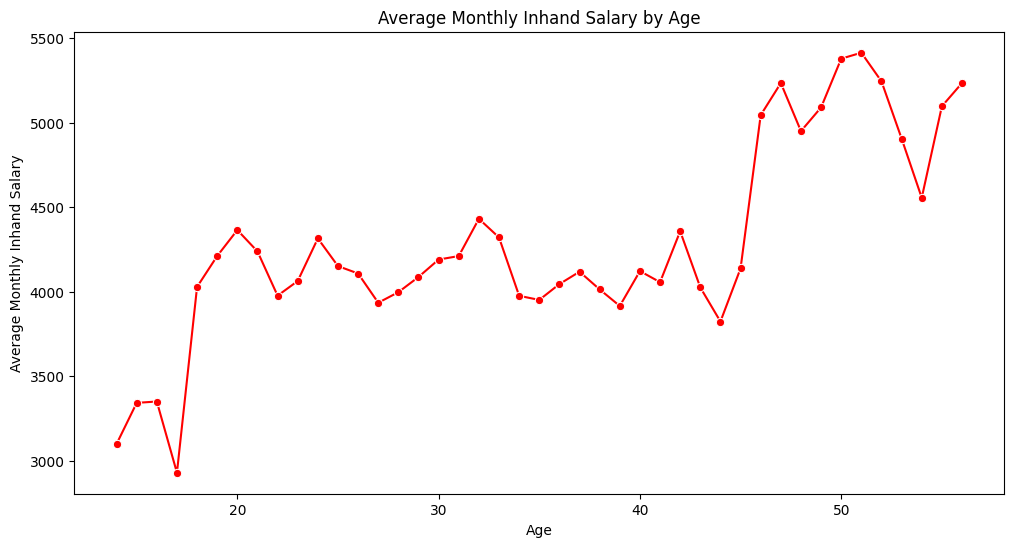

In [26]:
# Line plot to visualize the average Monthly Inhand Salary across different ages
age_salary_mean = data.groupby('Age')['Monthly_Inhand_Salary'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Monthly_Inhand_Salary', data=age_salary_mean, marker='o', color='red')
plt.title('Average Monthly Inhand Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Monthly Inhand Salary')
plt.show()


**Distribution of Number of Credit Cards by Annual Income**

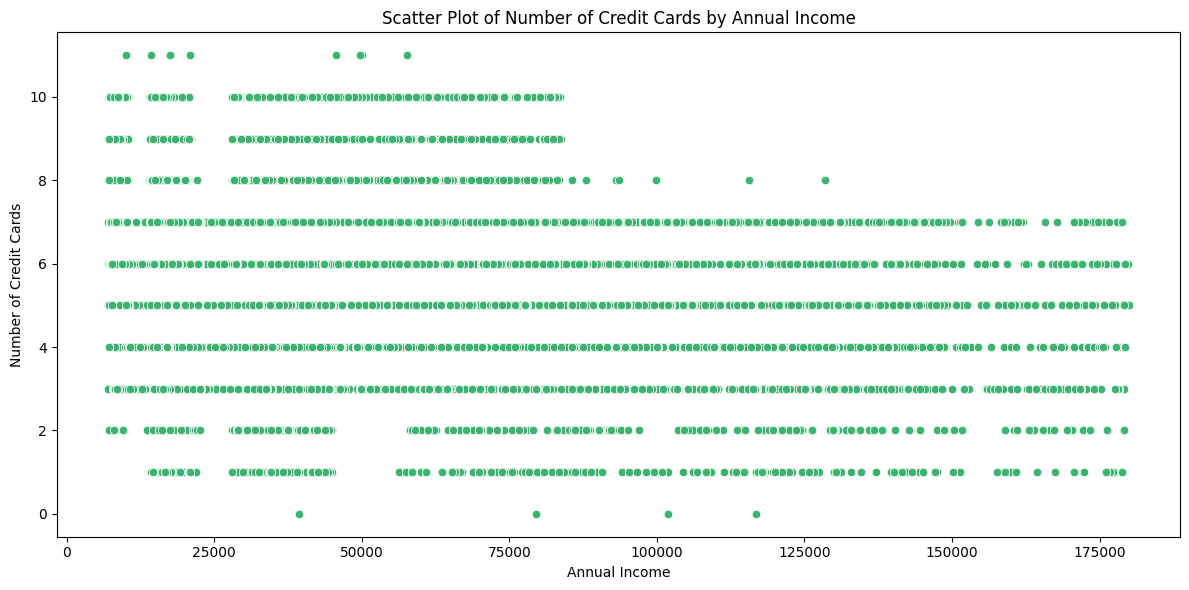

In [27]:
# Bivariate analysis for Annual_Income vs Num_Credit_Card

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Num_Credit_Card', data=data, color='mediumseagreen')
plt.title('Scatter Plot of Number of Credit Cards by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Credit Cards')
plt.tight_layout()
plt.show()


**Number of Credit Cards by Monthly_Inhand_Salary**

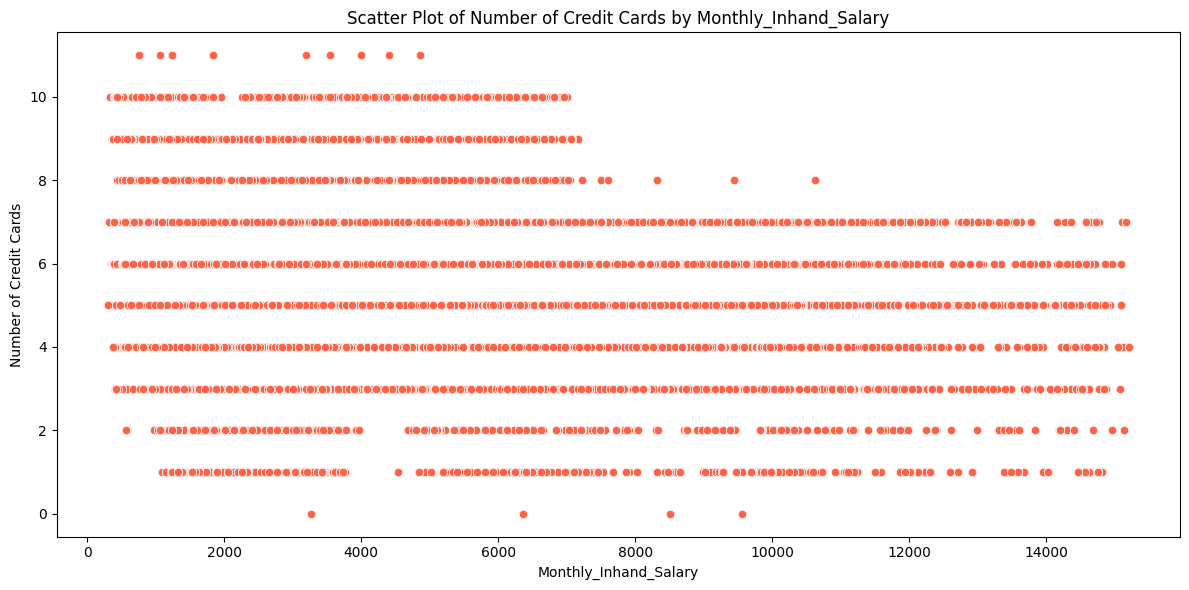

In [28]:
# Bivariate analysis for Monthly_Inhand_Salary vs Num_Credit_Card

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Monthly_Inhand_Salary', y='Num_Credit_Card', data=data,color = '#FF6347')
plt.title('Scatter Plot of Number of Credit Cards by Monthly_Inhand_Salary')
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Number of Credit Cards')
plt.tight_layout()
plt.show()


**Distribution of Delay_from_due_date by Annual Income**

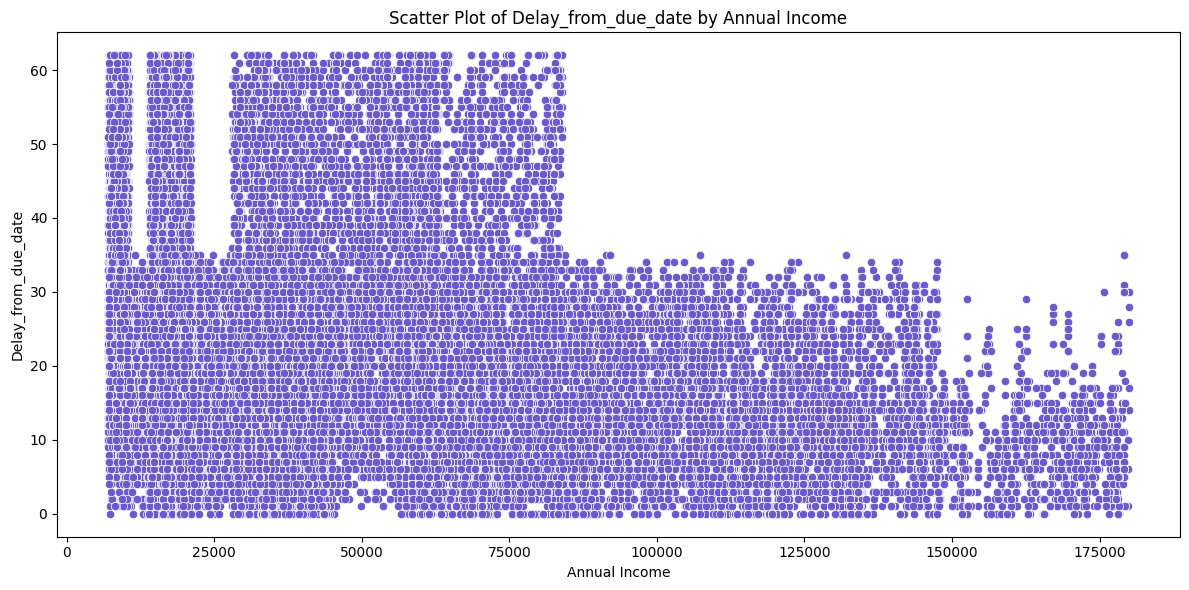

In [29]:
# Bivariate analysis for Annual_Income vs Delay_from_due_date

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Delay_from_due_date', data=data, color='slateblue')
plt.title('Scatter Plot of Delay_from_due_date by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Delay_from_due_date')
plt.tight_layout()
plt.show()


**Distribution of Num_of_Delayed_Payment by Annual Income**

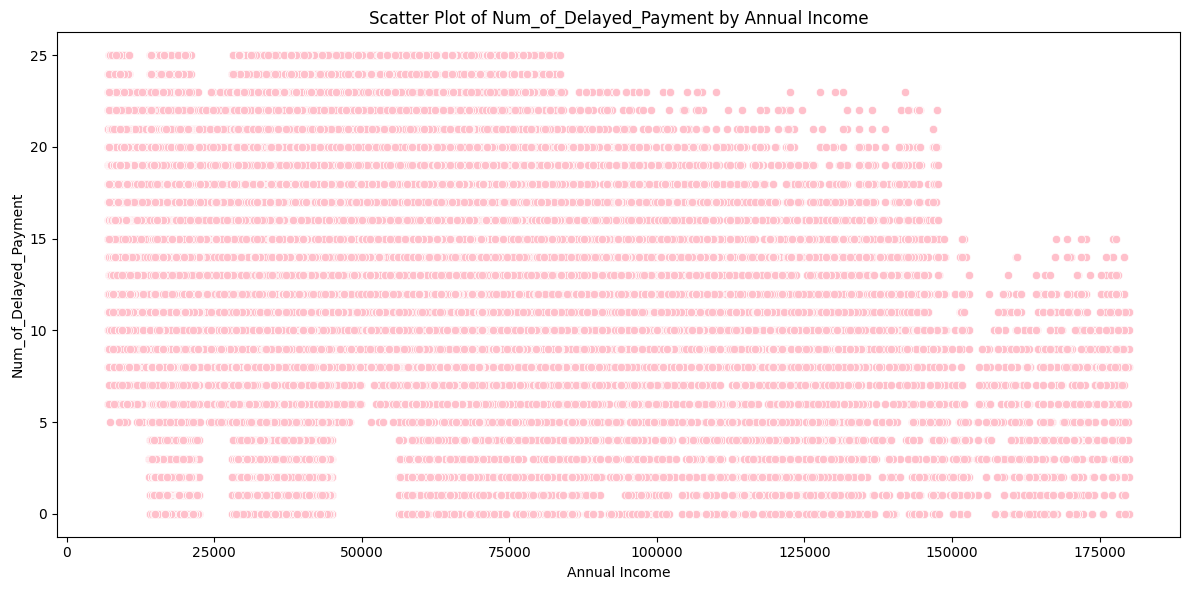

In [30]:
# Bivariate analysis for Annual_Income vs Num_of_Delayed_Payment

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Num_of_Delayed_Payment', data=data,color = 'pink')
plt.title('Scatter Plot of Num_of_Delayed_Payment by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Num_of_Delayed_Payment')
plt.tight_layout()
plt.show()


**Distribution of Outstanding_Debt by Annual Income**

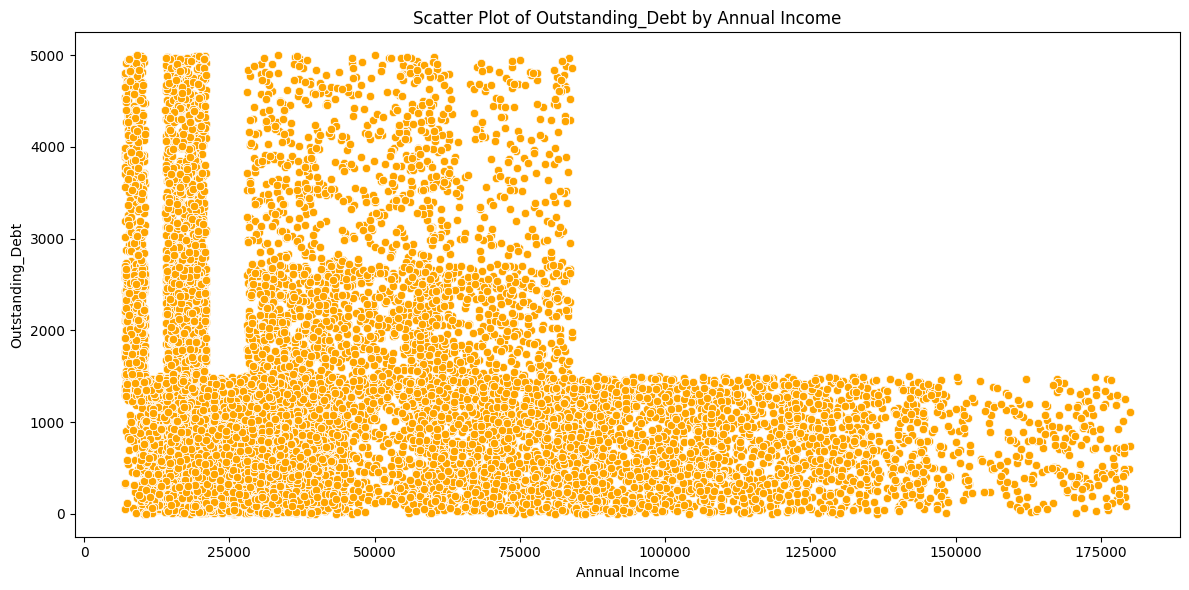

In [31]:
# Bivariate analysis for Annual_Income vs Outstanding_Debt

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', data=data,color='orange')
plt.title('Scatter Plot of Outstanding_Debt by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Outstanding_Debt')
plt.tight_layout()
plt.show()


**Distribution of Outstanding Debt by Occupation**

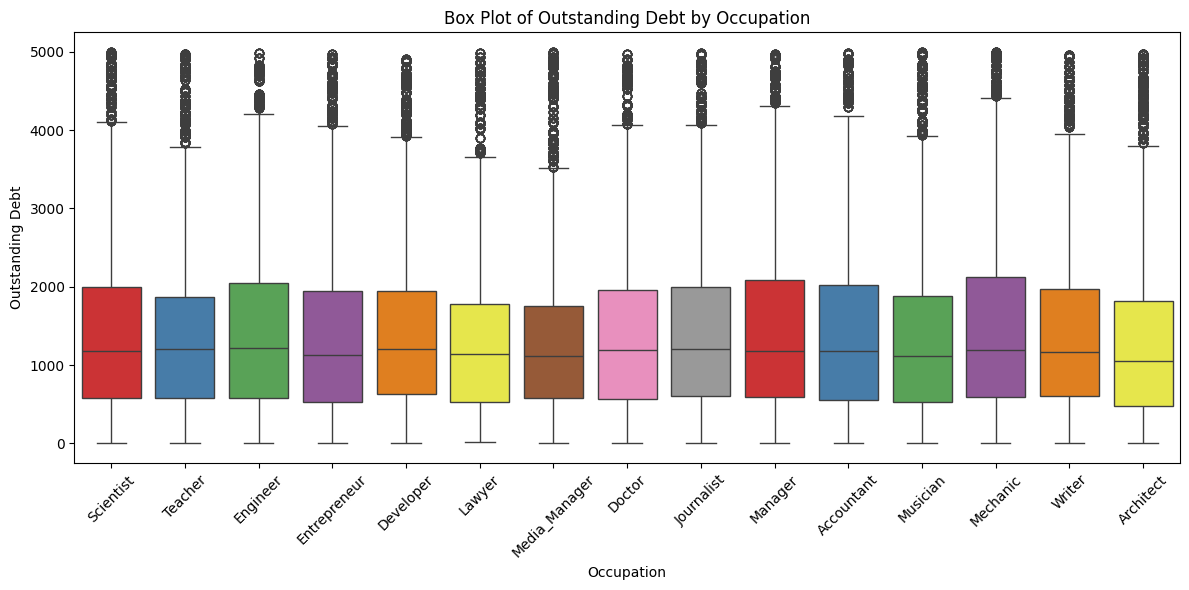

In [32]:
# Bivariate analysis for Occupation vs Outstanding_Debt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Outstanding_Debt', data=data, palette='Set1')
plt.title('Box Plot of Outstanding Debt by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Outstanding Debt')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of Total EMI per Month by Occupation**

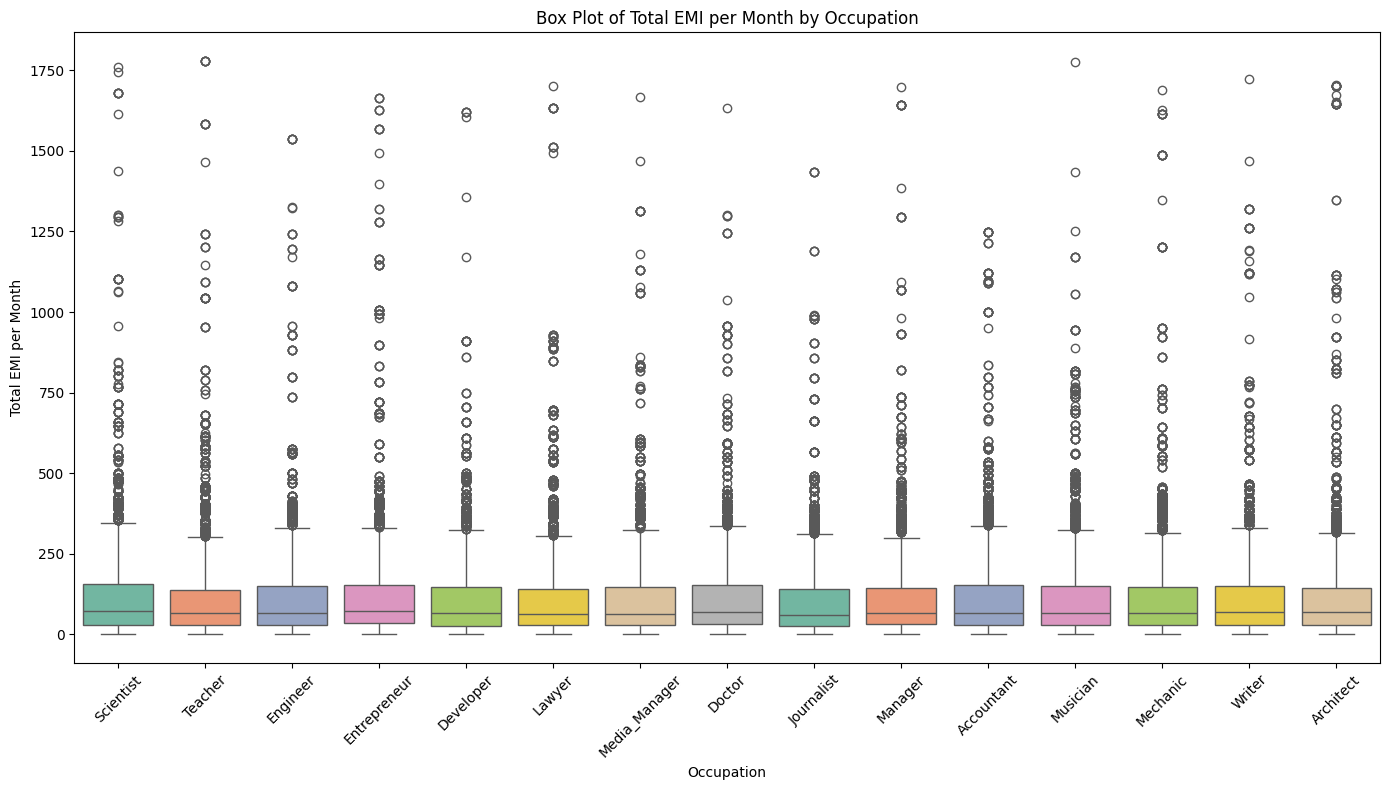

In [33]:
# Bivariate analysis for Occupation vs Total_EMI_per_month

plt.figure(figsize=(14, 8))
sns.boxplot(x='Occupation', y='Total_EMI_per_month', data=data, palette='Set2')
plt.title('Box Plot of Total EMI per Month by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total EMI per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of Annual Income by Occupation**


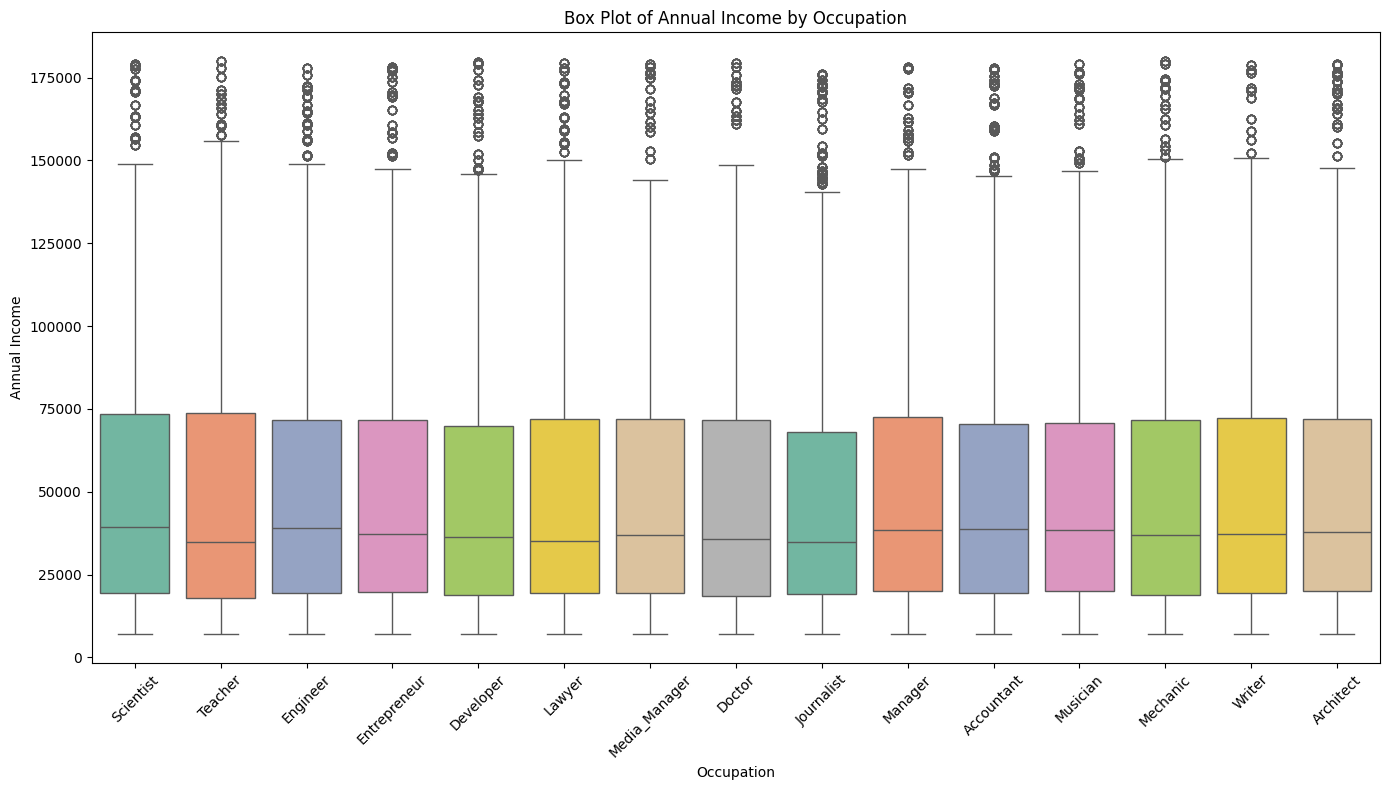

In [34]:
# Bivariate analysis for Occupation vs Annual_Income

plt.figure(figsize=(14, 8))
sns.boxplot(x='Occupation', y='Annual_Income', data=data, palette='Set2')
plt.title('Box Plot of Annual Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of Monthly Inhand Salary by Occupation**

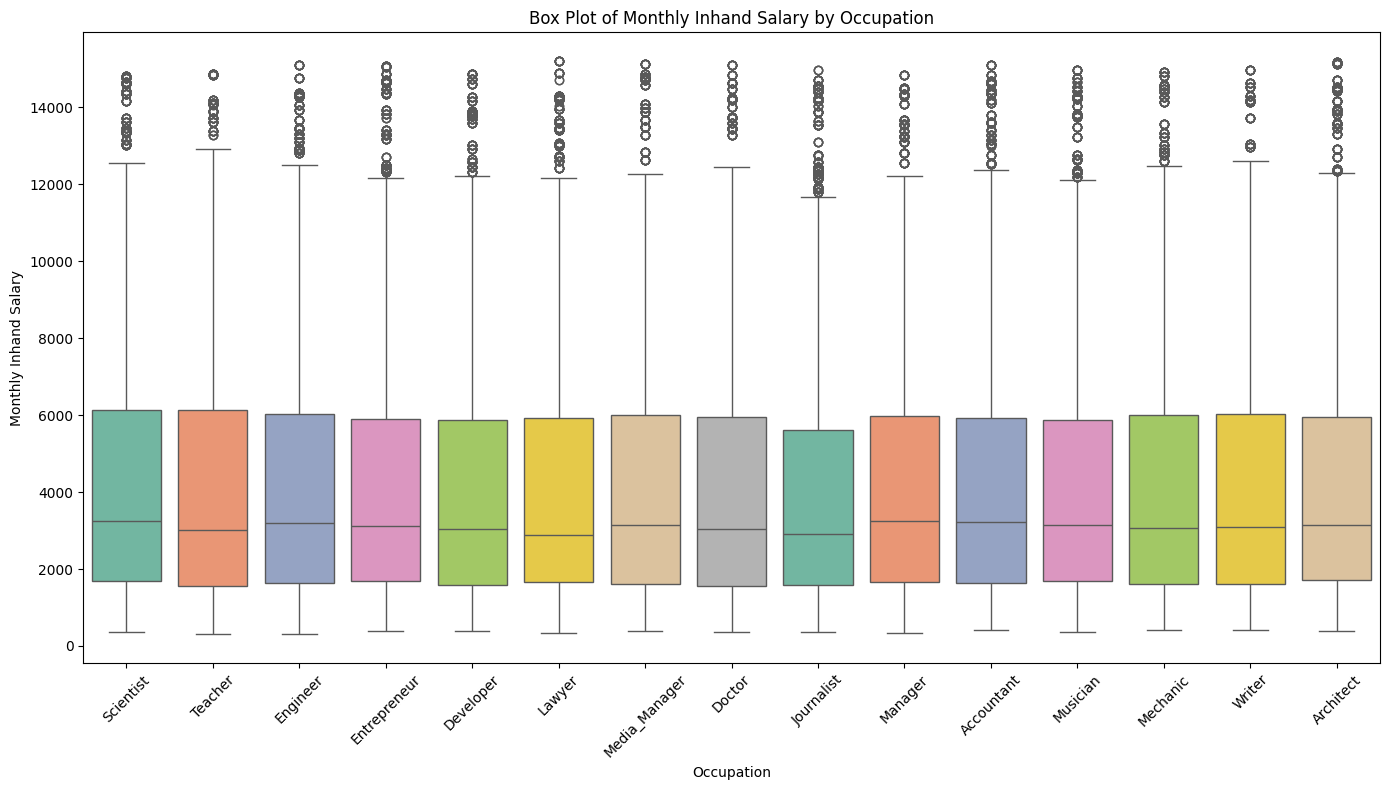

In [35]:
# Bivariate analysis for Occupation vs Monthly_Inhand_Salary

plt.figure(figsize=(14, 8))
sns.boxplot(x='Occupation', y='Monthly_Inhand_Salary', data=data, palette='Set2')
plt.title('Box Plot of Monthly Inhand Salary by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Monthly Inhand Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of Number of Bank Accounts by Occupation**

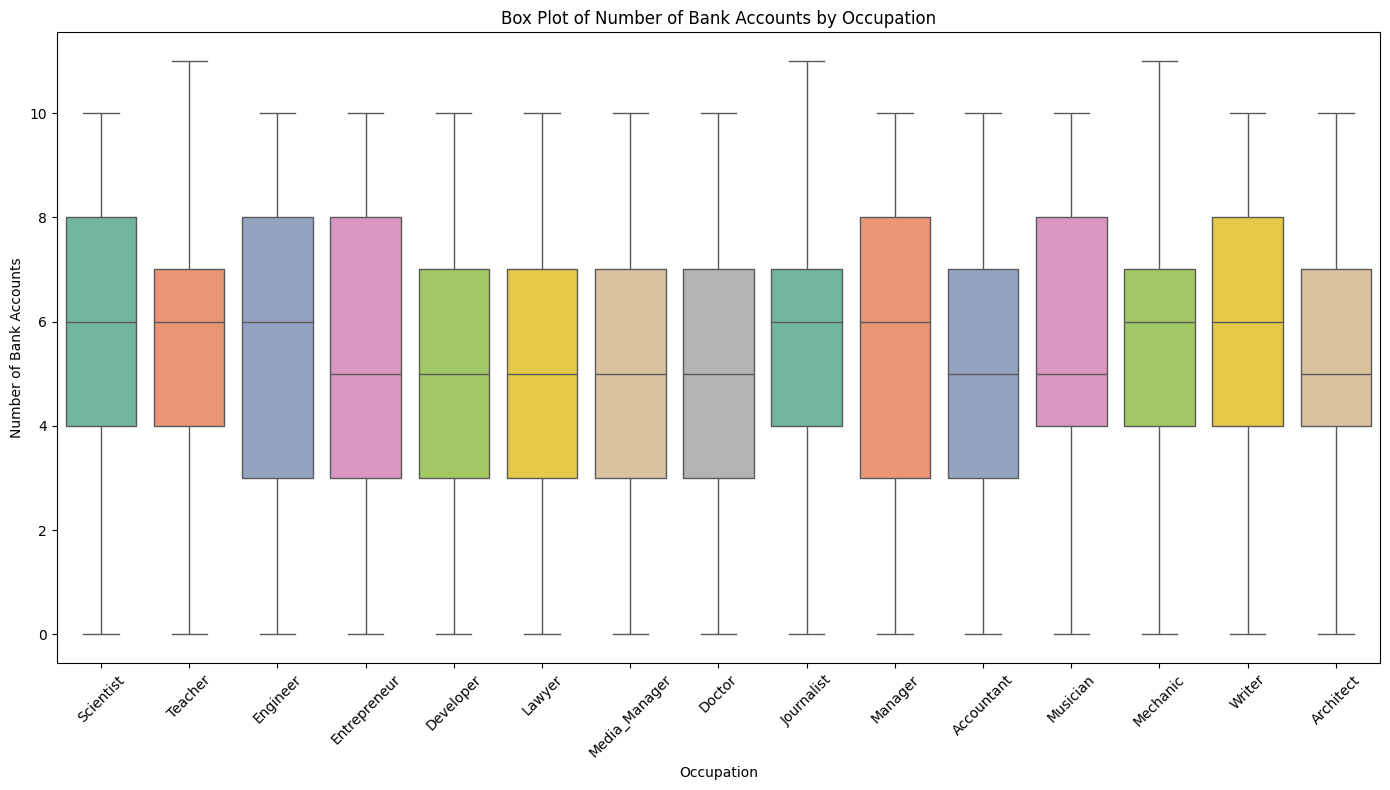

In [36]:
# Bivariate analysis for Occupation vs Num_Bank_Accounts

plt.figure(figsize=(14, 8))
sns.boxplot(x='Occupation', y='Num_Bank_Accounts', data=data, palette='Set2')
plt.title('Box Plot of Number of Bank Accounts by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Bank Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


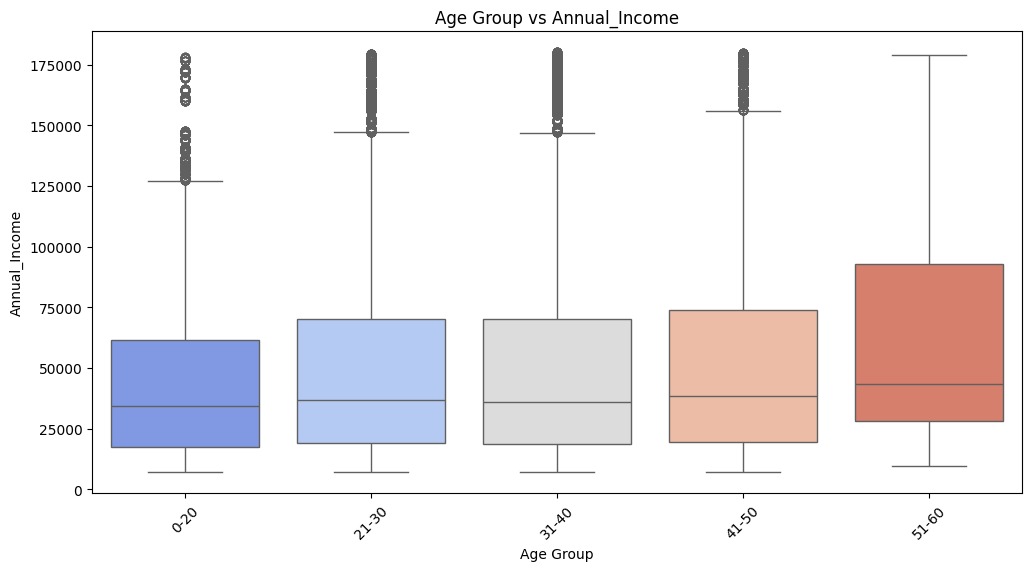

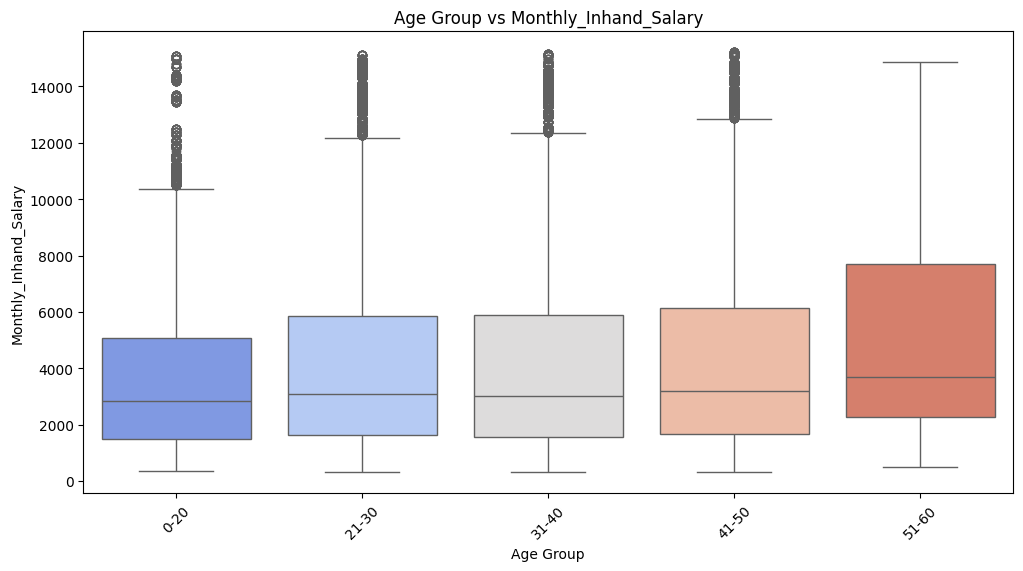

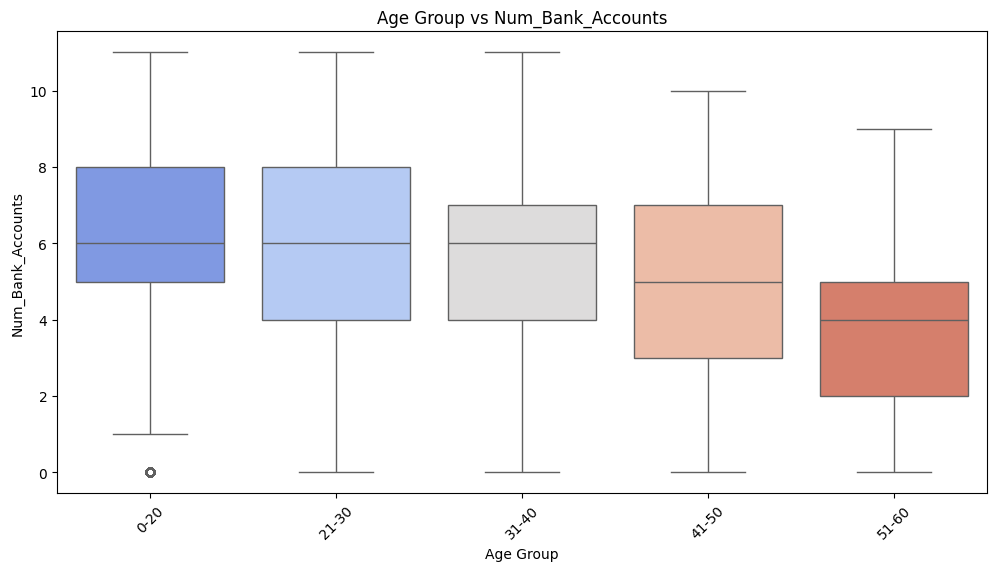

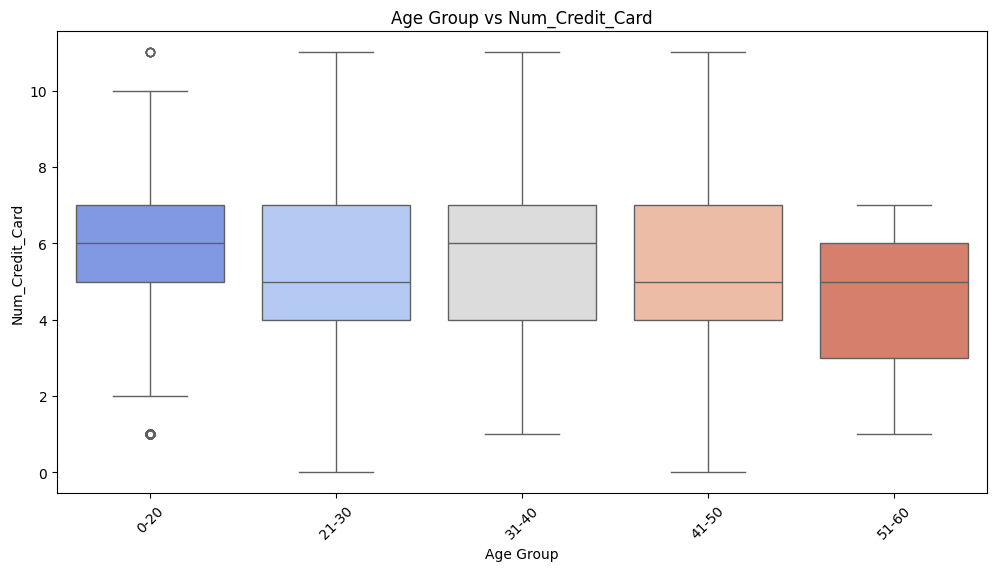

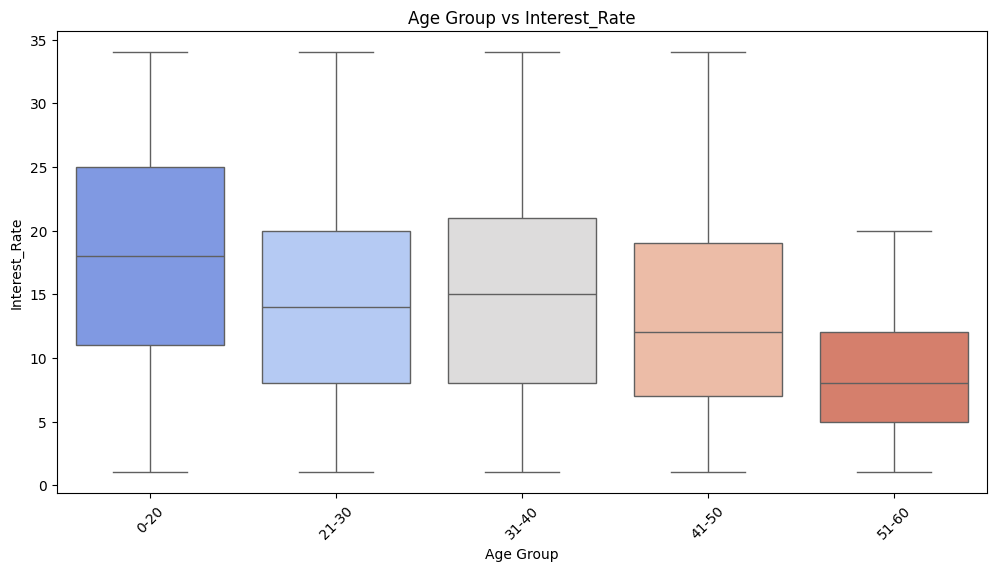

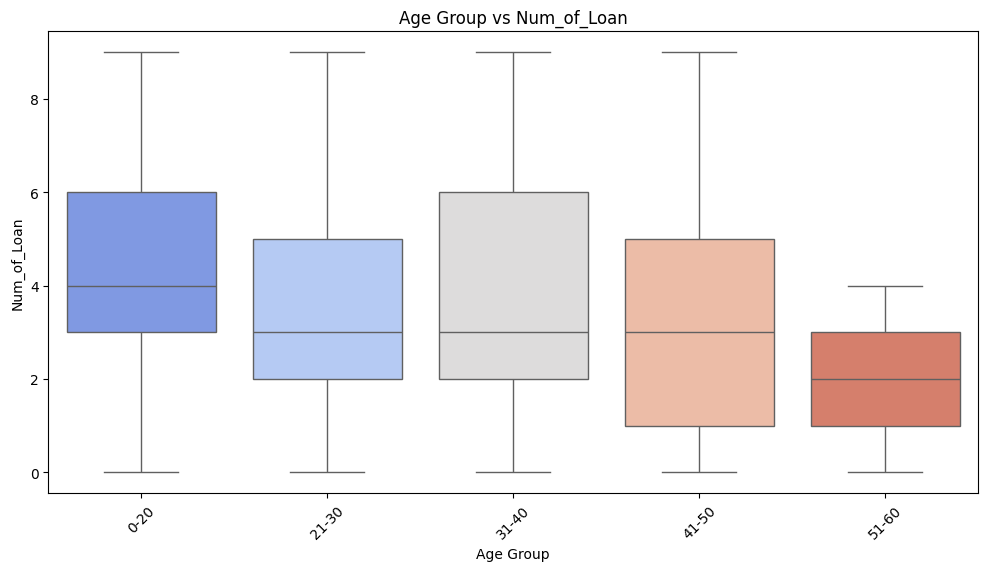

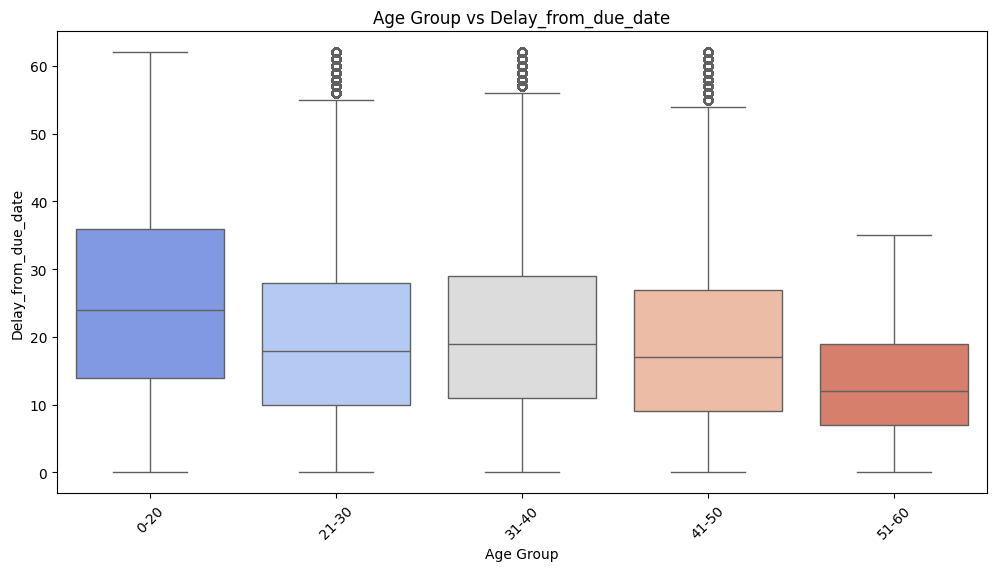

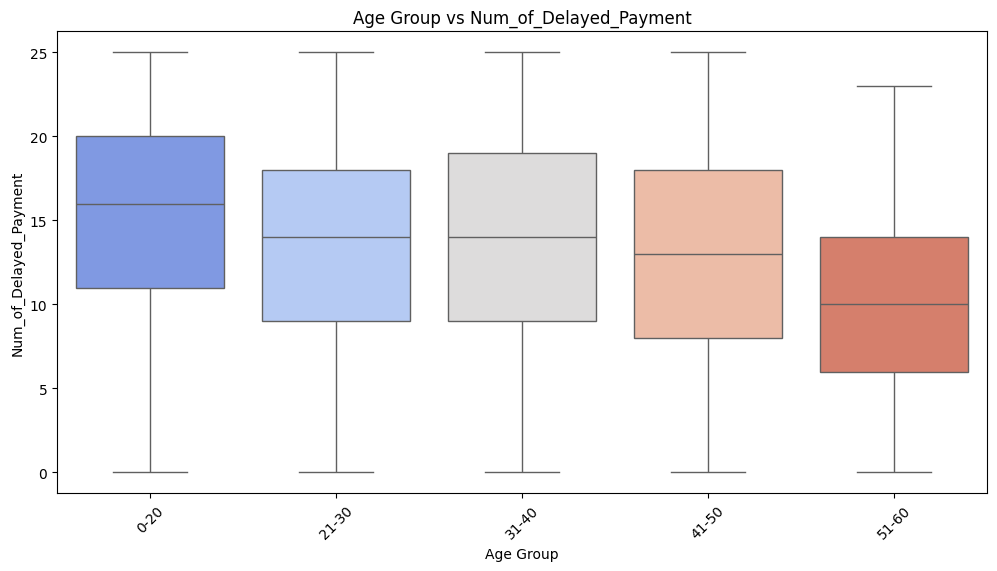

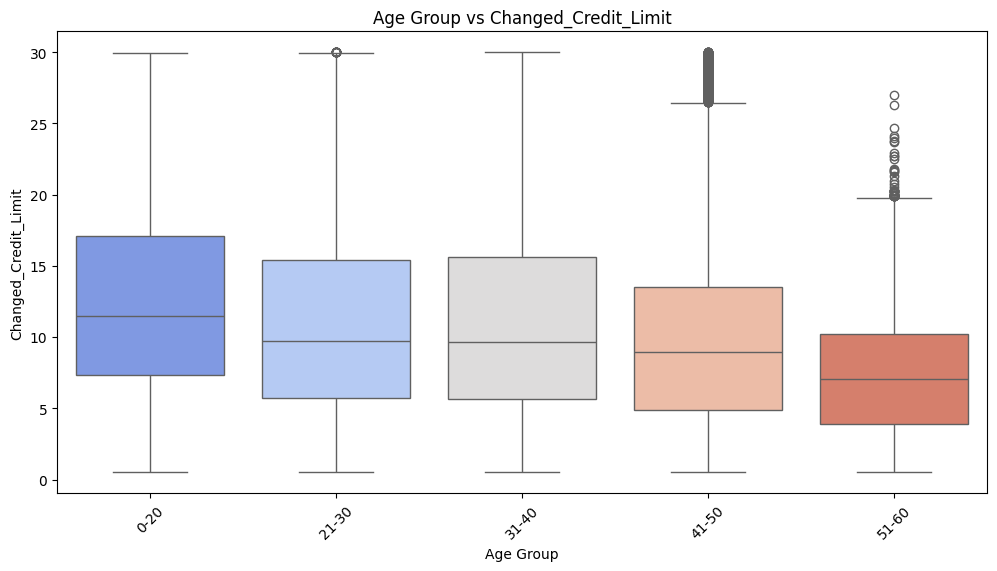

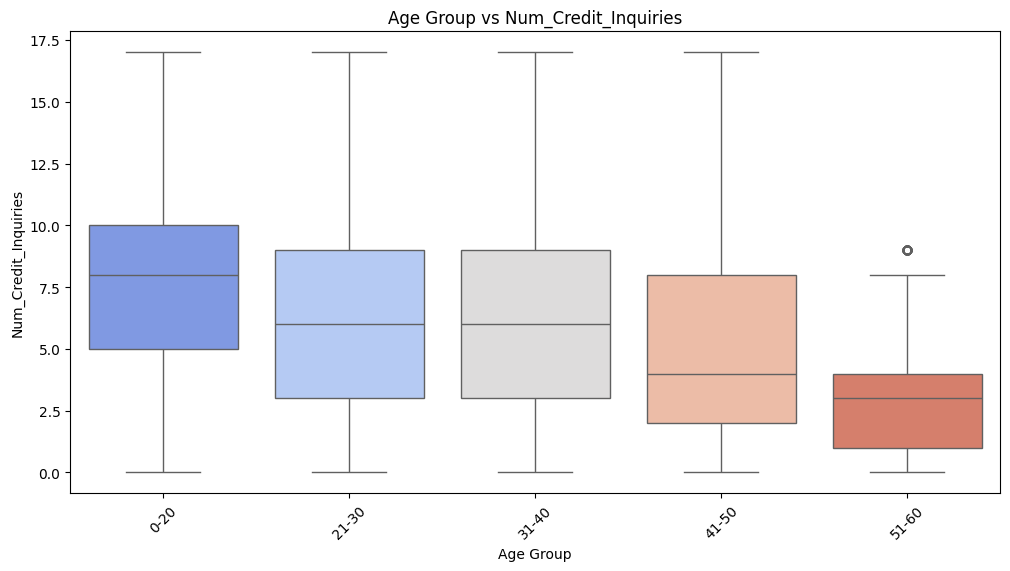

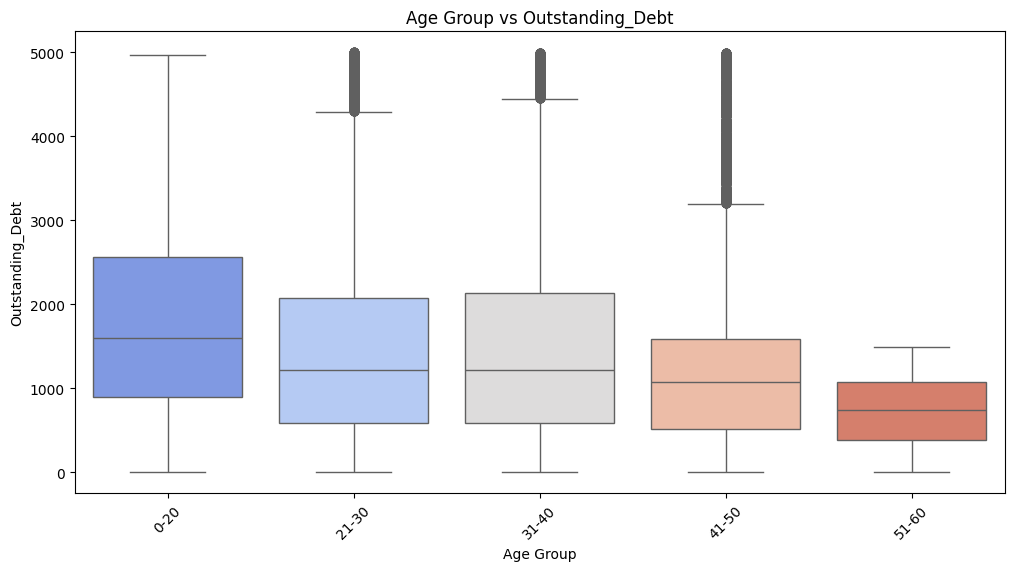

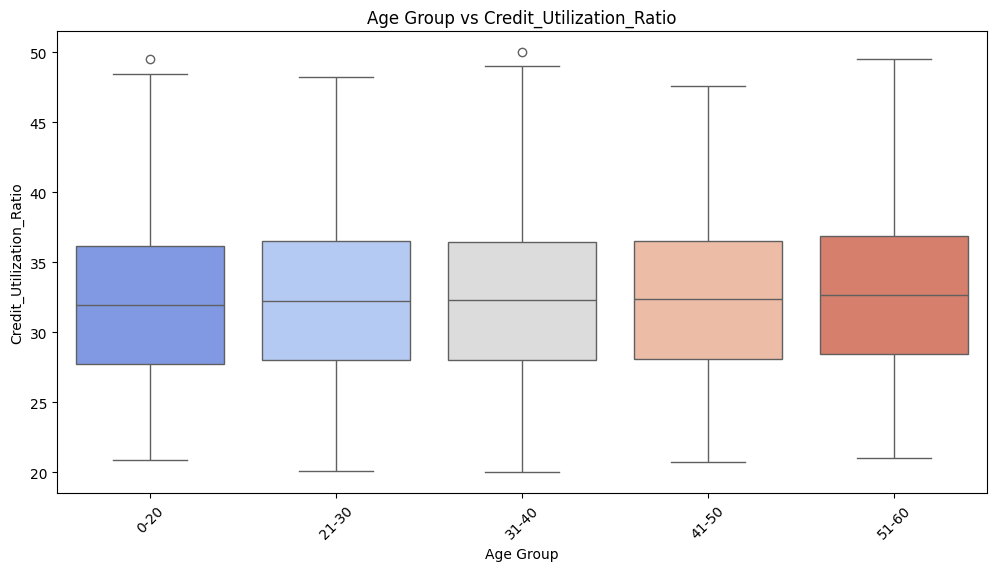

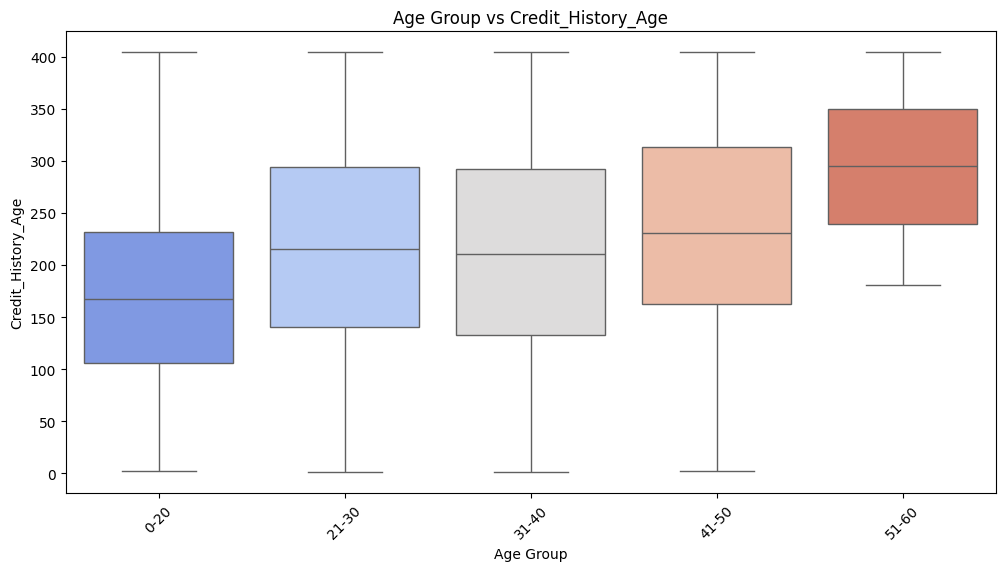

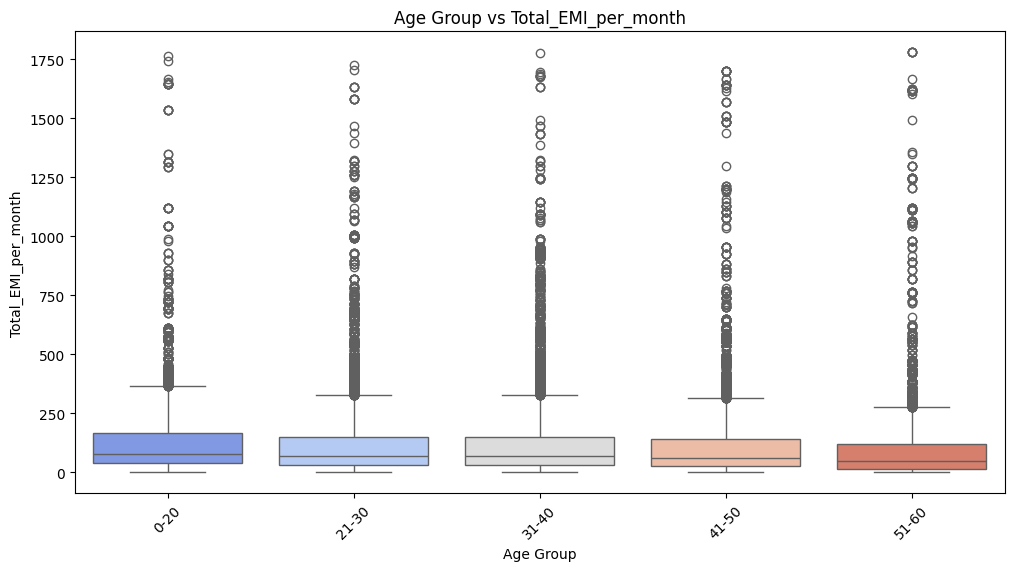

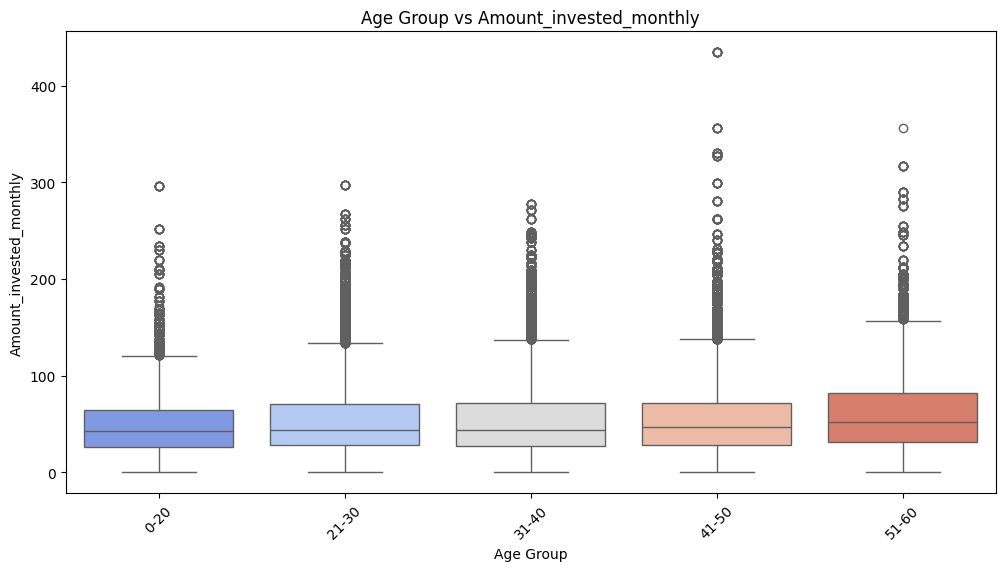

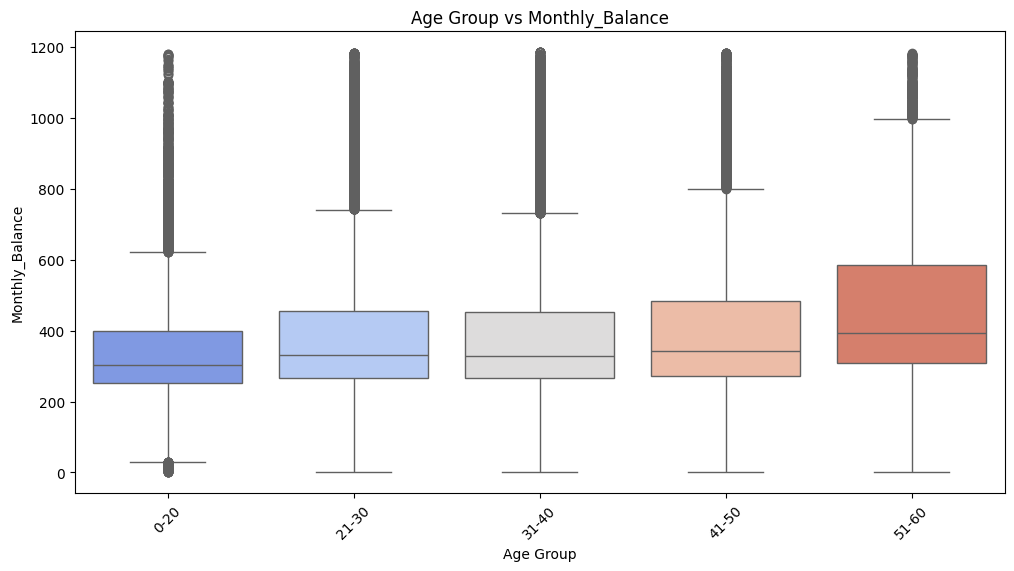

In [37]:
# Define the numerical columns to be analyzed
numerical_columns = [
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

# Plotting Age_Group vs each numerical column using boxplots
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Age_Group', y=column, data=data,palette='coolwarm')
    plt.title(f'Age Group vs {column}')
    plt.xlabel('Age Group')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()


### Inferences from the EDA

#### Numerical Features

1. **Annual Income:**
   
    Most people have lower annual incomes.The presence of high-income outliers suggests a mix of customers from different socioeconomic backgrounds. This variability can influence credit scoring models, as higher income typically correlates with better creditworthiness.

2. **Monthly Inhand Salary:**

     Consistency between annual and monthly income distributions confirms accurate reporting. Higher monthly salaries can lead to better financial stability and lower credit risk.

3. **Num Bank Accounts:**

     Majority have fewer bank accounts.Customers with more bank accounts might have better financial management skills. However, a very high number might indicate complexity in financial management.

4. **Num Credit Card:**
   
     Having more credit cards can increase credit limits but also the potential risk if not managed properly.

5. **Interest Rate:**
   
     More people associated with higher interest rates. Higher interest rates might be associated with riskier credit profiles or those with lower credit scores.

6. **Num of Loan:**

     Most individuals have fewer loans. Multiple loans can indicate financial strain or good credit management, depending on the repayment behavior.

7. **Delay from Due Date:**
   
     Payments are made closer to the due date. Frequent delays are a strong indicator of poor credit behavior and potential risk.

8. **Num of Delayed Payment:**
   
     Most people have fewer delayed payments. A high number of delayed payments is typically correlated with lower credit scores and higher risk.

9. **Changed Credit Limit:**
   
     Frequent changes in credit limits might indicate financial instability or proactive credit management by the issuer.

10. **Num Credit Inquiries:**
    
     Numerous credit inquiries can signal credit-seeking behavior, often viewed as a risk factor.

11. **Outstanding Debt**
     
     High levels of debt relative to income can indicate financial stress, which is crucial for credit risk assessment.

12. **Credit Utilization Ratio:**
    
     More individuals have higher credit utilization ratios. Higher utilization ratios negatively impact credit scores as they indicate higher reliance on credit.

13. **Credit History Age:**
    
    Longer credit histories generally suggest more reliable credit behavior and positively impact credit scores.

14. **Total EMI per Month:**
    
    Many individuals pay smaller total EMIs per month. High EMIs can indicate significant financial obligations, impacting the customer’s ability to manage additional credit.

15. **Amount Invested Monthly:**

    More individuals invest smaller amounts monthly. Regular investments suggest good financial habits and long-term financial planning.

16. **Monthly Balance:**
    
    Positive balances suggest good financial management, while negative balances indicate potential financial difficulties.

#### Categorical Features

1. **Occupation:**
   
   Certain occupations correlate with higher income and better creditworthiness, impacting credit scoring models.

2. **Credit Mix:**
   
   **Inference:** A diverse credit mix generally positively impacts credit scores, indicating well-rounded credit behavior.

3. **Payment of Min Amount:**
   
   Regularly paying only the minimum amount might indicate financial strain and can negatively impact credit scores.

4. **Payment Behaviour:**
   
   Consistent on-time payments are indicative of good credit behavior, whereas frequent delays suggest higher risk.

5. **Credit Score (Target Variable):**
   
   Understanding the distribution of credit scores helps in setting classification thresholds and evaluating model performance.

#Data Preprocessing

In [38]:
# Check for duplicates in the entire DataFrame
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### **Missing Values**

In [39]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Age_Group                   0
dtype: int64

After observing the above, there are some columns which are not neccessary.So, We will be dropping those columns to enrich the data.



###**Drop-irrelevant columns**

In [40]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Age_Group'],
      dtype='object')

In [41]:
col = data[['Type_of_Loan', 'Name', 'ID', 'Customer_ID', 'SSN', 'Month', 'Age_Group', 'Occupation', 'Payment_Behaviour', 'Credit_Mix']]  # Wrap column names in quotes
for i in col:
  print(i, data[i].nunique())

Type_of_Loan 6261
Name 10128
ID 100000
Customer_ID 12500
SSN 12500
Month 8
Age_Group 5
Occupation 15
Payment_Behaviour 6
Credit_Mix 3


In [42]:
irrelevant_columns = [ 'ID', 'Customer_ID', 'Month', 'SSN','Type_of_Loan', 'Name','Age_Group','Occupation','Payment_Behaviour','Credit_Mix']
data = data.drop(columns = irrelevant_columns)

In [43]:
data.dtypes.value_counts()

float64    17
object      2
Name: count, dtype: int64

###**Outlier Detection**

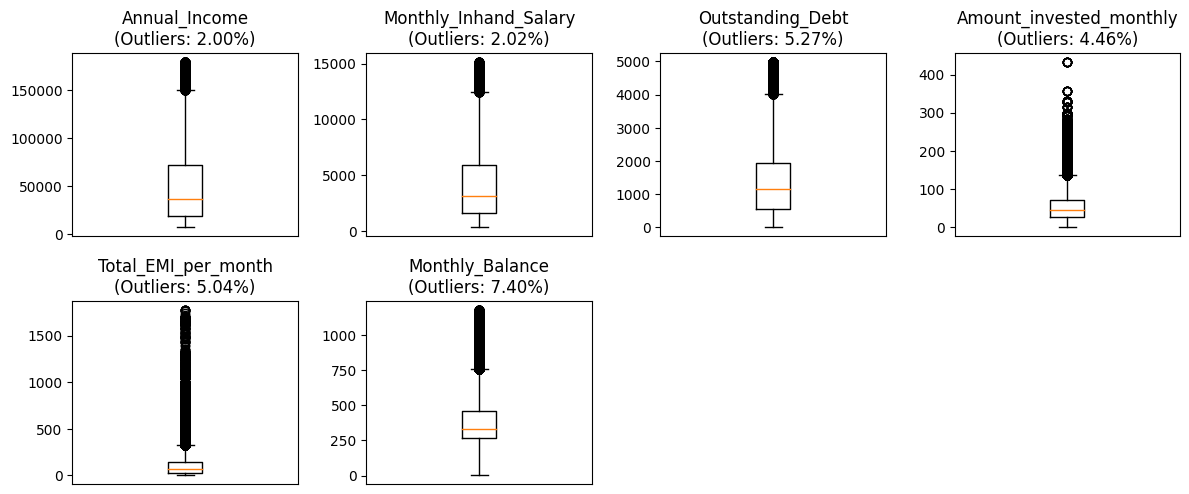

In [44]:
# List of continuous columns
continuous_columns = ['Annual_Income','Monthly_Inhand_Salary', 'Outstanding_Debt', 'Amount_invested_monthly',
                      'Total_EMI_per_month','Monthly_Balance']

# Calculate outlier percentage for each column
outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

All outliers in our dataset are relevant to the analysis and are therefore not being handled separately.

###**Mapping-target column**

In [45]:
# Define the mapping
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Apply the mapping to the target column
data['Credit_Score'] = data['Credit_Score'].map(credit_score_mapping)

# Display the updated Dataset
data.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     4.0                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620               265.0   
1            809.98                 31.944960               266.0   
2            809.98                 28.609352               267.0   
3            809.98                 31.377862               268.0   
4            809.98                 24.797347               269.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

   Monthly_Balance  Credit_Score  
0       312.494089             2  
1       284.629162             2  
2       331.209863             2  
3       223.451310             2  
4       341.489231             2

In [46]:
data['Credit_Score'].value_counts()

Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

###**Encoding**


***One Hot Encoding***

In [47]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['Payment_of_Min_Amount'])

# Display the DataFrame
print(data.head())


    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Outstanding_Debt  \
0                     7.0                 11.27  ...            809.98   
1               

In [48]:
data.shape

(100000, 21)

### **Remove Highly Correlated Variables**


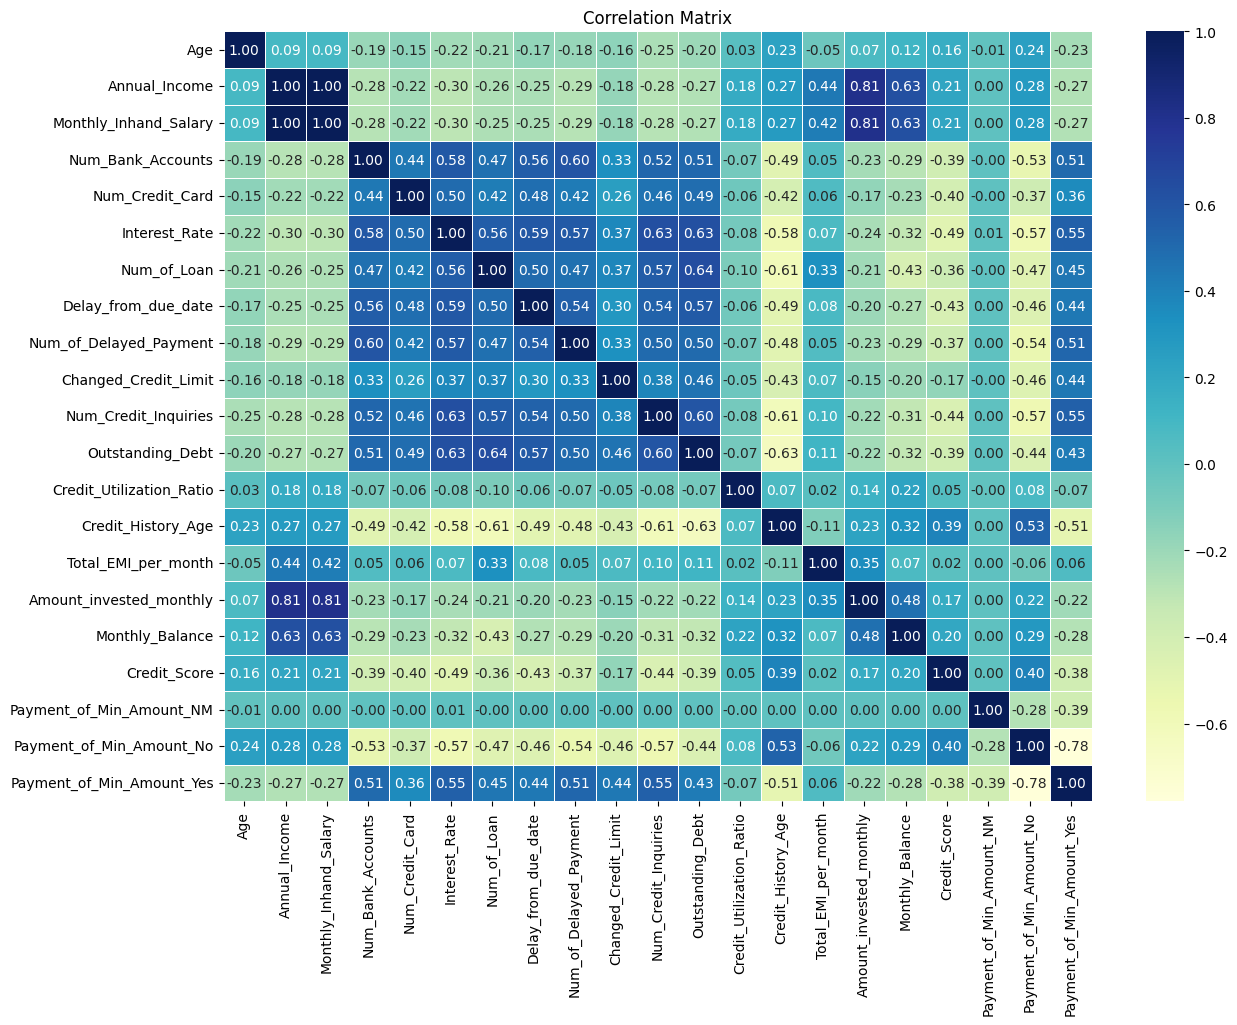

In [49]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [50]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.81
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.81
Amount_invested_monthly and Annual_Income: 0.81
Amount_invested_monthly and Monthly_Inhand_Salary: 0.81


we can observe that Annual_Income and Monthly_Inhand_salary are highly coreelated, which is not good for our model, So I will be dropping Monthly_Inhand_salary as it has less relevance when compared to annual Income for a credit score classifier. Likewise,Amount_invested_monthly and Annual_Income are highly correlated,So We will be dropping Amount_invested_monthly.



In [51]:
data.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'], axis=1, inplace=True)

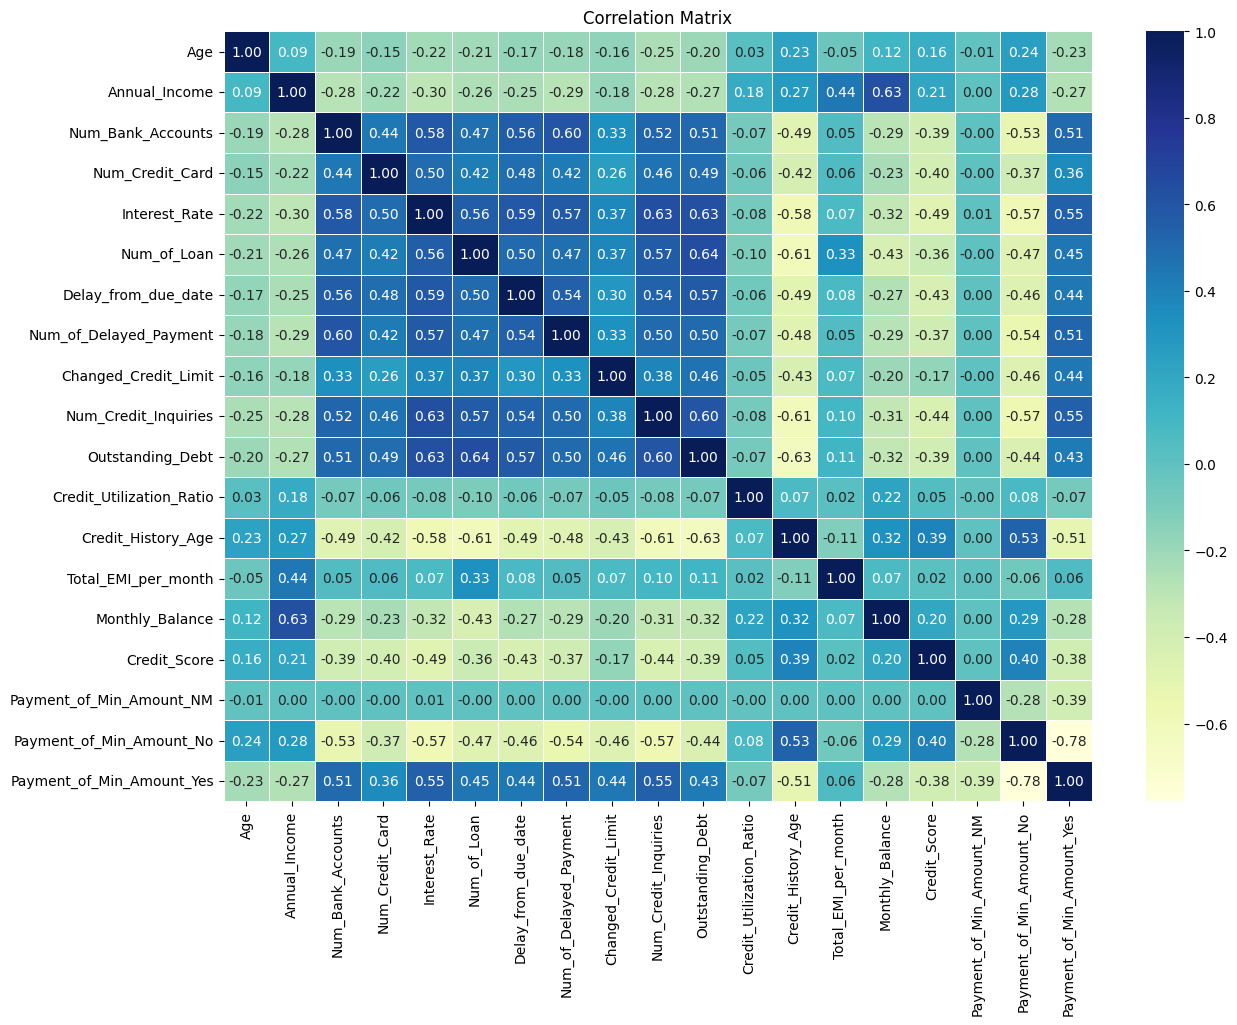

In [52]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [53]:
data.shape

(100000, 19)

In [54]:
data['Credit_Score'].value_counts()


Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

#**Data Split**

In [55]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']




***Balancing out the imbalanced classes using the SMOTE technique***


In [56]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

In [57]:
y.value_counts()


Credit_Score
2    53174
1    53174
0    53174
Name: count, dtype: int64

In [58]:
# Step 1: Split the data into 70% training and 30% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split the temporary set into 50% validation and 50% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the sizes of the resulting sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 111665
Validation set size: 23928
Test set size: 23929


# **Feature Selection**

### **Recursive Feature Elimination with Cross-Validation (RFECV)**
RFECV is a feature selection method that recursively removes the least important features while using cross-validation to determine the optimal number of features. It aims to enhance the model's performance by selecting the most relevant features.

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Initialize the RFECV object with a RandomForestClassifier
estimator = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='accuracy')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features: ", selected_features)

# Transform the training, validation, and test data using the selected features
X_train_selected = rfecv.transform(X_train)
X_val_selected = rfecv.transform(X_val)
X_test_selected = rfecv.transform(X_test)


Optimal number of features: 17
Selected features:  Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
      dtype='object')


In [61]:
X_train_selected.shape

(111665, 17)

# **Implement Algorithm**


#**Model Selection,Training and Evaluation**

**Random Forest**


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score


# Initialize the model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train_selected, y_train)

# Predict on the validation set
y_val_pred = random_forest.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Random Forest:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
print("Random Forest Validation Accuracy without hyperparameter tuning:", val_accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred))


Random Forest:
  Precision: 0.8705
  Recall: 0.8711
  F1 Score: 0.8694
Random Forest Validation Accuracy without hyperparameter tuning: 0.8710715479772652
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7976
           1       0.86      0.77      0.81      7976
           2       0.88      0.94      0.91      7976

    accuracy                           0.87     23928
   macro avg       0.87      0.87      0.87     23928
weighted avg       0.87      0.87      0.87     23928



***Tuning Hyperparameters-RF***


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distributions for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model on the training data
random_search_rf.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", random_search_rf.best_params_)

# Make predictions on the testing data
y_pred = random_search_rf.best_estimator_.predict(X_val_selected)

print("\nRandom Forest Validation Accuracy with hyperparameter tuning")
accuracy_rf_tuned = accuracy_score(y_val, y_pred)
print(accuracy_rf_tuned)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}

Random Forest Validation Accuracy with hyperparameter tuning
0.8643848211300569


**Gradient Boosting**


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_gb = gb.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_gb, average='weighted')
recall = recall_score(y_val, y_val_pred_gb, average='weighted')
f1 = f1_score(y_val, y_val_pred_gb, average='weighted')

print('Gradient Boosting Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
print("Gradient Boosting Validation Accuracy without Hyperparameter tuning:", val_accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_val_pred_gb))


Gradient Boosting Classifier:
  Precision: 0.7347
  Recall: 0.7350
  F1 Score: 0.7313
Gradient Boosting Validation Accuracy without Hyperparameter tuning: 0.7349548645937813
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      7976
           1       0.71      0.59      0.65      7976
           2       0.72      0.85      0.78      7976

    accuracy                           0.73     23928
   macro avg       0.73      0.73      0.73     23928
weighted avg       0.73      0.73      0.73     23928



Tuning Hyperparameters

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(100, 150),       # Reduced upper bound
    'learning_rate': uniform(0.05, 0.1),     # Narrower range
    'max_depth': randint(3, 4),              # Narrower range
    'min_samples_split': randint(2, 5),      # Narrower range
    'min_samples_leaf': randint(1, 2),       # Narrower range
    'subsample': uniform(0.9, 0.1),          # Narrower range
    'max_features': ['auto', 'sqrt', 'log2'] # Categorical choices
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_distributions, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model on the training data
random_search.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Make predictions on the testing data
y_pred_tuned = random_search.best_estimator_.predict(X_val_selected)

# Calculate the accuracy score
accuracy_tuned_gb = accuracy_score(y_val, y_pred_tuned)
print(" Gradient Boosting Accuracy Score with hyperparameter tuning:", accuracy_tuned_gb)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'learning_rate': 0.14385527090157502, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 132, 'subsample': 0.9304242242959538}
 Gradient Boosting Accuracy Score with hyperparameter tuning: 0.7414744232698094


**Decision Tree**


In [66]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_dt = dt.predict(X_val_selected)


# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_dt, average='weighted')
recall = recall_score(y_val, y_val_pred_dt, average='weighted')
f1 = f1_score(y_val, y_val_pred_dt, average='weighted')

print('Decision Tree Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print("Decision Tree Validation Accuracy without Hyperparameter tuning:", val_accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_val_pred_dt))


Decision Tree Classifier:
  Precision: 0.8044
  Recall: 0.8052
  F1 Score: 0.8047
Decision Tree Validation Accuracy without Hyperparameter tuning: 0.8052072885322634
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      7976
           1       0.74      0.72      0.73      7976
           2       0.86      0.87      0.86      7976

    accuracy                           0.81     23928
   macro avg       0.80      0.81      0.80     23928
weighted avg       0.80      0.81      0.80     23928



Tuning Hyperparameters

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40],
    'min_samples_leaf': [1, 5, 10, 20, 30],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the testing data
y_pred = grid_search.best_estimator_.predict(X_val_selected)

print("\n Decision Tree Accuracy Score with Hyperparameter tuning:")
accuracy_dt_tuned = accuracy_score(y_val, y_pred)
print(accuracy_dt_tuned)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

 Decision Tree Accuracy Score with Hyperparameter tuning:
0.8037445670344366


**Naive Bayes**


In [67]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_nb = nb.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_nb, average='weighted')
recall = recall_score(y_val, y_val_pred_nb, average='weighted')
f1 = f1_score(y_val, y_val_pred_nb, average='weighted')

print('Naive Bayes Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_nb = accuracy_score(y_val, y_val_pred_nb)
print("Naive Bayes Validation Accuracy without Hyperparameter tuning:", val_accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_val_pred_nb))


Naive Bayes Classifier:
  Precision: 0.6766
  Recall: 0.6609
  F1 Score: 0.6409
Naive Bayes Validation Accuracy without Hyperparameter tuning: 0.6608993647609496
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7976
           1       0.70      0.36      0.47      7976
           2       0.60      0.89      0.72      7976

    accuracy                           0.66     23928
   macro avg       0.68      0.66      0.64     23928
weighted avg       0.68      0.66      0.64     23928



**XGBoost**


In [68]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_xgb, average='weighted')
recall = recall_score(y_val, y_val_pred_xgb, average='weighted')
f1 = f1_score(y_val, y_val_pred_xgb, average='weighted')

print('XGBoost Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("XGBoost Validation Accuracy without Hyperparameter tuning:", val_accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))



XGBoost Classifier:
  Precision: 0.8112
  Recall: 0.8116
  F1 Score: 0.8098
XGBoost Validation Accuracy without Hyperparameter tuning: 0.8116014710799064
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7976
           1       0.79      0.71      0.75      7976
           2       0.81      0.90      0.85      7976

    accuracy                           0.81     23928
   macro avg       0.81      0.81      0.81     23928
weighted avg       0.81      0.81      0.81     23928



In [75]:
# Create a dictionary with model names as keys and accuracies as values
accuracy_dict = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Naive Bayes', 'XGBoost'],
    'Validation Accuracy': [val_accuracy_rf, val_accuracy_gb, val_accuracy_dt, val_accuracy_nb, val_accuracy_xgb]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_dict)

# Sort the DataFrame by 'Validation Accuracy' in descending order
accuracy_sorted = accuracy_df.sort_values(by='Validation Accuracy', ascending=False)

# Display the sorted DataFrame
print(accuracy_sorted)



               Model  Validation Accuracy
0      Random Forest             0.871072
4            XGBoost             0.811601
2      Decision Tree             0.805207
1  Gradient Boosting             0.734955
3        Naive Bayes             0.660899


  **Random Forest model without hyperparameter exhibit higher accuracy, it can be concluded that Random Forest is the best models.**
